# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.7'

## Specifying filetype, and folder as before

In [5]:
# This specifies what file type your Raman exported in. 
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

In [7]:
np_x = joblib.load('np_x.sav')

FileNotFoundError: [Errno 2] No such file or directory: 'np_x.sav'

In [8]:
pwd

'c:\\Users\\penny\\Box\\Berkeley_new\\DiadFit_outer\\docs\\Examples\\Fitting_Fermi_Diads\\Example1b_CO2_Fluid_inclusions_withstandards'

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [6]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong'). After selecting one, go through and select another one and run again from here. 
batch='Medium' # Options are Std, Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')
if batch=='Std':
    GroupN_df=joblib.load('Std_df.sav')

FileNotFoundError: [Errno 2] No such file or directory: 'np_x.sav'

### Now load one file from this group to tweak parameters for

In [46]:
Diad_Files =GroupN_df['filename']
i=0


### Lets plot the diad to have a look at it

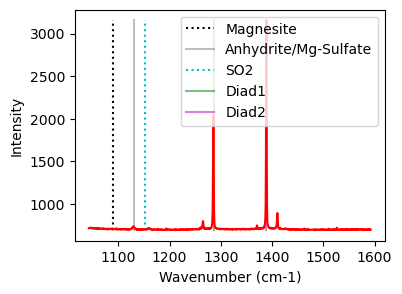

In [47]:
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [48]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [49]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

# FG04 Standards
if batch=='Std':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init


if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240), upper_bck_diad1=(1315, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=1413.6109462560908, HB_prom=104.37095184669647, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0          1285.338356       1285.338406        0.002218       2791.147753   

   Diad1_Voigt_Sigma  Diad1_Voigt_Gamma     HB1_Cent    HB1_Area  HB1_Sigma  \
0           0.713516                  0  1265.127109  331.034681    1.07491   

   Diad1_Combofit_Height  Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm  \
0            1453.107904          4.4077        0.649391    1.427033   

         Diad1_refit  Diad1_Asym50  Diad1_Asym70  Diad1_Yuan2017_sym_factor  \
0  Flagged Warnings:        1.1725      1.176685                   0.246163   

   Diad1_Remigi2021_BSF   Diad1_PDF_Model  
0              0.000982  PseudoVoigtModel

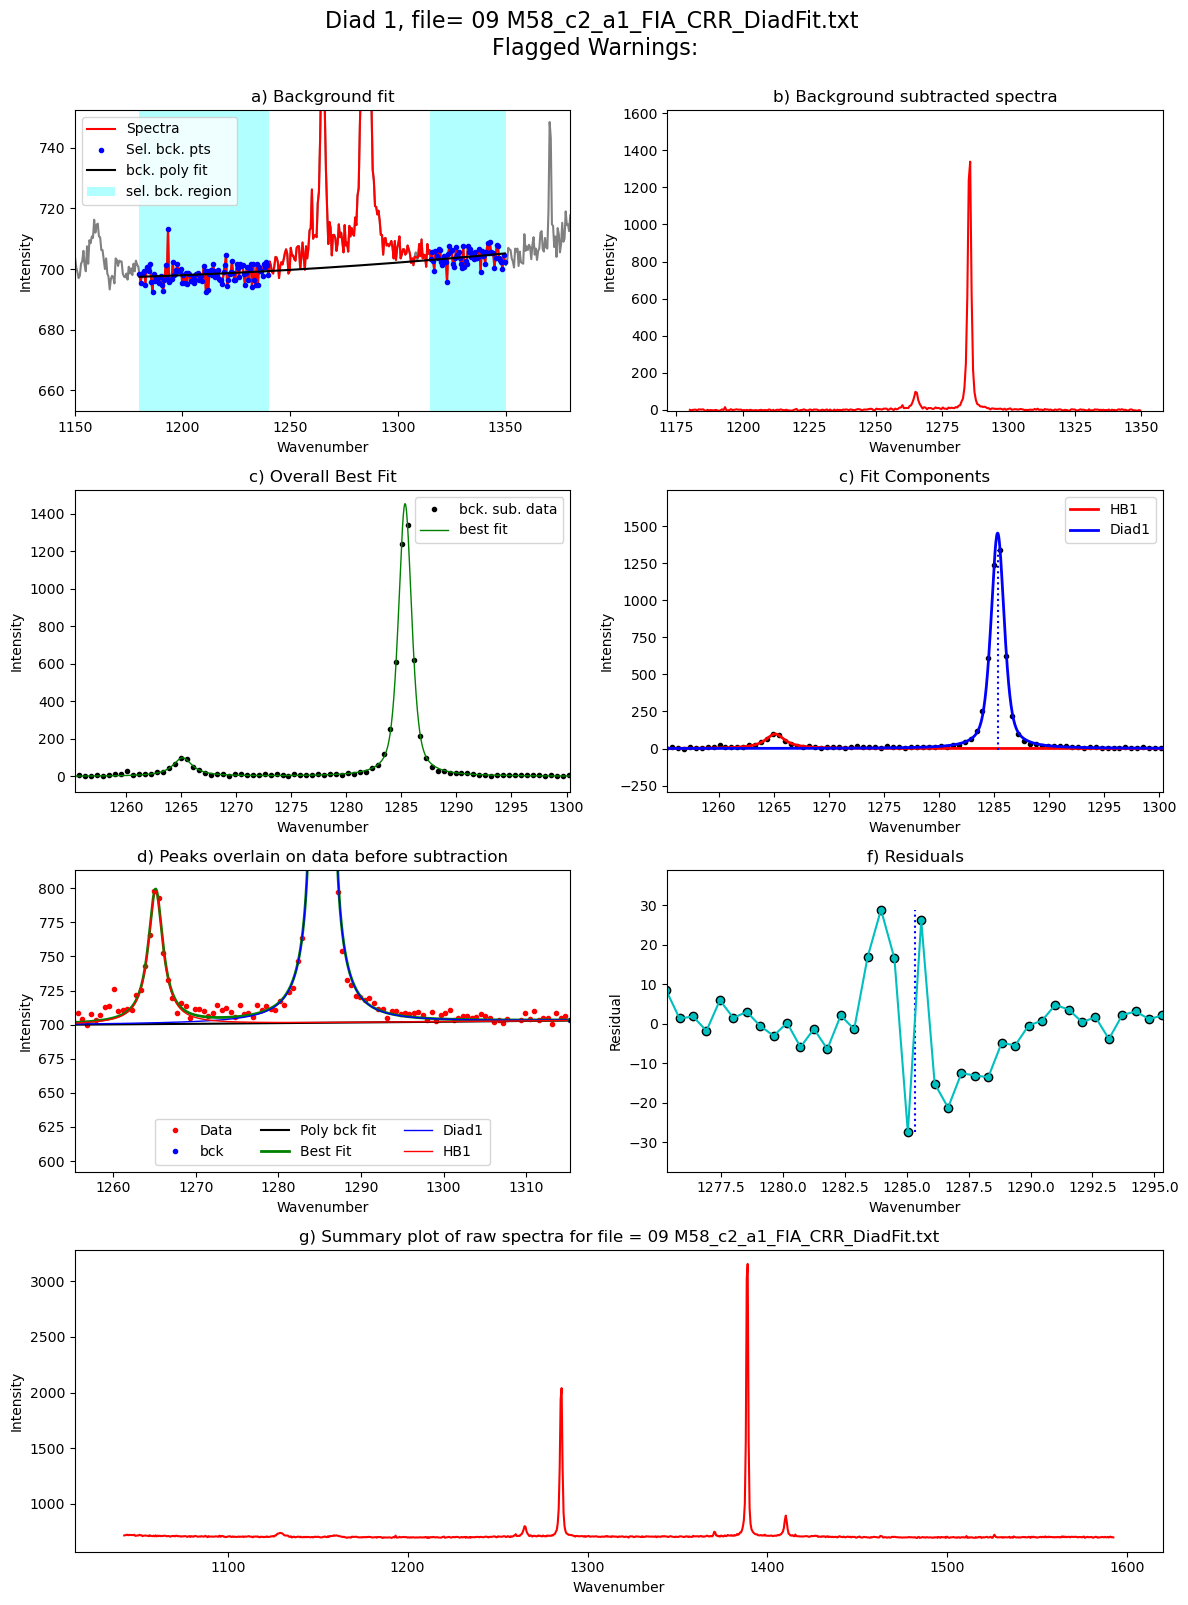

In [50]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=Diad_Files.iloc[0],
filetype=spectra_filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [51]:
diad1_fit_config2=diad1_fit_config_init

## Fit diad2

In [52]:
if batch=='Std':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init


if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.4,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=3, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1350), upper_bck_diad2=(1440, 1470), fit_gauss=False, gauss_amp=388.85307081688484, diad_sigma=1, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=2672.724838342757, HB_prom=194.42653540844242, C13_prom=44.651893969109665, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False)

### See what these fit parameters look like for diad2

Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0           1388.79449        1388.79444        0.001257       4351.324925   

   Diad2_Voigt_Sigma  Diad2_Voigt_Gamma     HB2_Cent   HB2_Area  HB2_Sigma  \
0           0.567733                  0  1410.157846  509.48224    0.85045   

      C13_Cent  ...  Diad2_Combofit_Height  Diad2_Residual  Diad2_Prop_Lor  \
0  1371.735005  ...            2850.220202         4.92034        0.646463   

   Diad2_fwhm        Diad2_refit  Diad2_Asym50 Diad2_Asym70  \
0    1.135466  Flagged Warnings:       1.09322     1.103896   

   Diad2_Yuan2017_sym_factor  Diad2_Remigi2021_BSF   Diad2_PDF_Model  
0                   0.105849              0.000398  PseudoVoigtModel  

[1 rows x 22 columns]

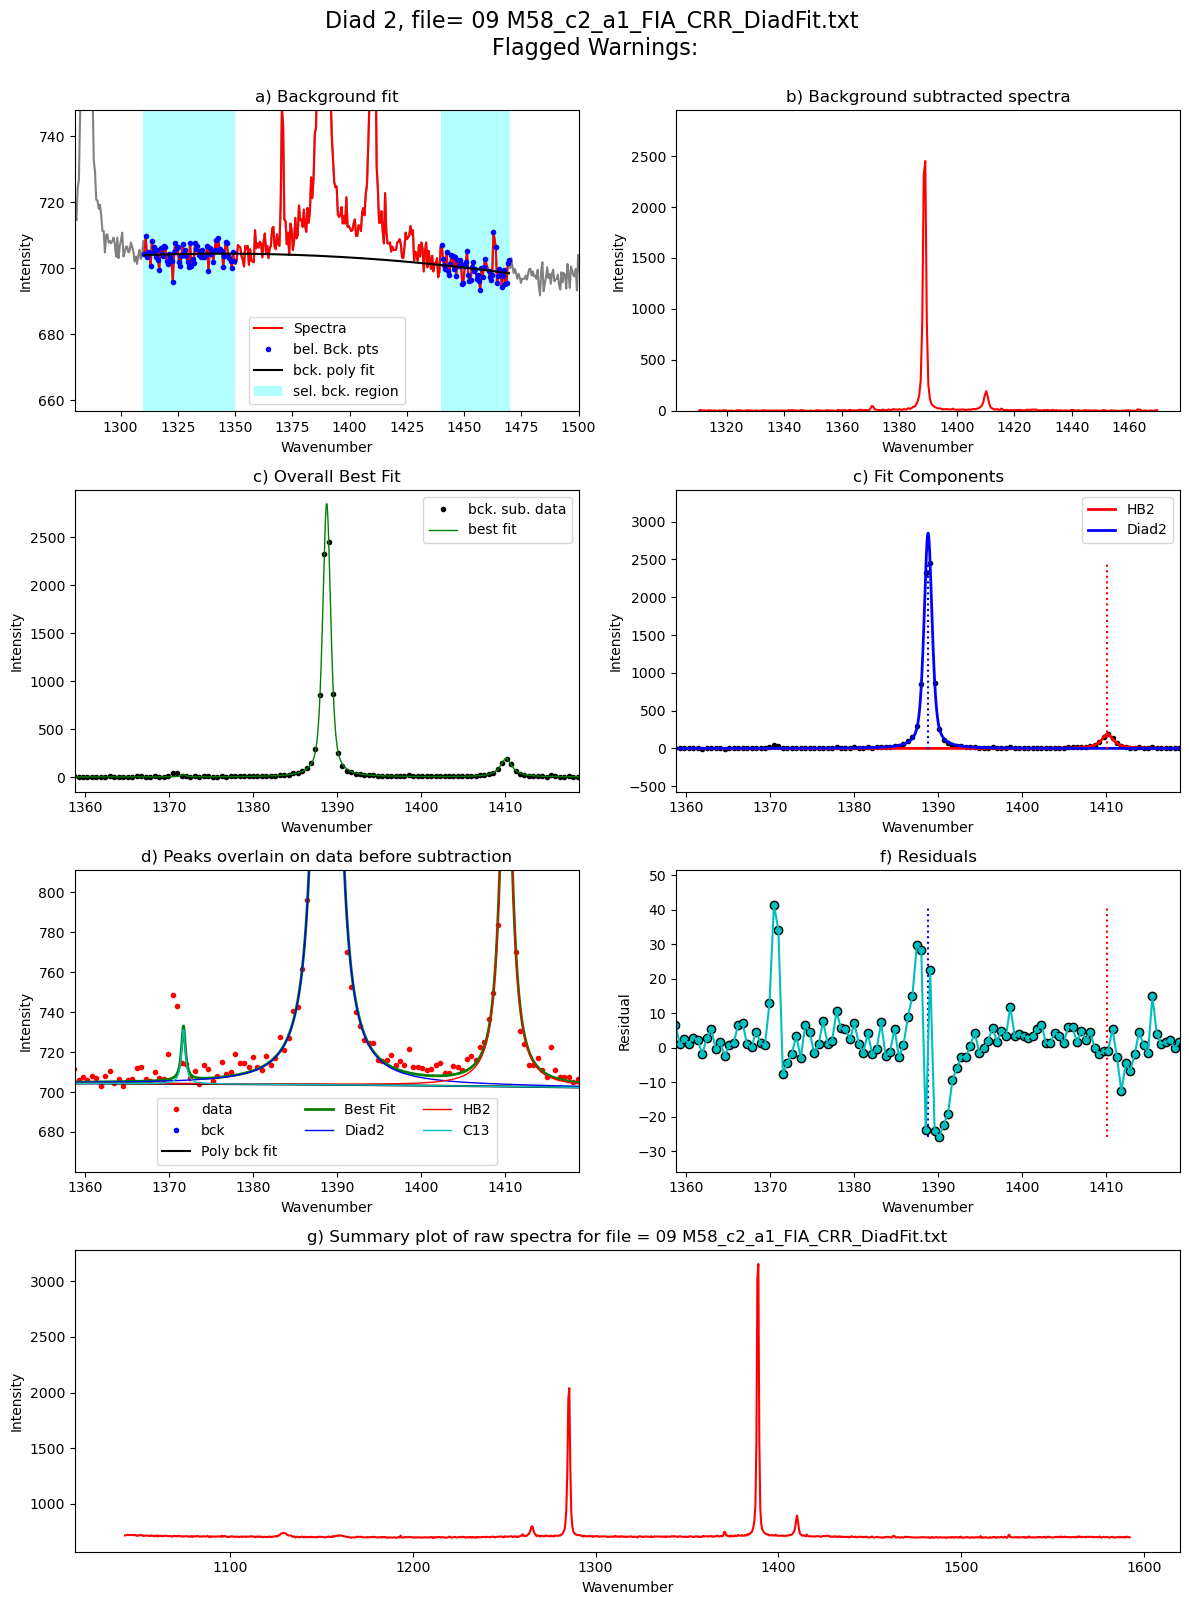

In [53]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/12 [00:00<?, ?it/s]

Processing file: 09 M58_c2_a1_FIA_CRR_DiadFit.txt


  8%|▊         | 1/12 [00:11<02:03, 11.19s/it]

Processing file: 10 M58_c3_a1_FIA.txt


 17%|█▋        | 2/12 [00:13<01:00,  6.05s/it]

Processing file: 11 M58_c4_a1_FIA.txt


 25%|██▌       | 3/12 [00:15<00:38,  4.33s/it]

Processing file: 14 M58_c7_a1_FIA.txt
refit attempt 1


 33%|███▎      | 4/12 [00:19<00:31,  3.97s/it]

Processing file: 15 M58_c9_a1_FIA.txt


 42%|████▏     | 5/12 [00:21<00:24,  3.47s/it]

Processing file: 18 M58_c11_a1_FIA.txt


 50%|█████     | 6/12 [00:25<00:20,  3.42s/it]

Processing file: 21 M58_c13_a1_FIA.txt


 58%|█████▊    | 7/12 [00:27<00:15,  3.01s/it]

Processing file: 22 M58_c13_a2_FIB.txt


 67%|██████▋   | 8/12 [00:30<00:11,  2.93s/it]

Processing file: 28 M58_c16_a1_FIB.txt


 75%|███████▌  | 9/12 [00:32<00:08,  2.71s/it]

Processing file: 30 M58_c19_a1_FIA.txt


 83%|████████▎ | 10/12 [00:38<00:07,  3.61s/it]c:\users\penny\box\berkeley_new\diadfit_outer\src\DiadFit\diads.py:3128: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(12, 16))


Processing file: 32 M58_c20_a1_FIA_CRR_DiadFit.txt


 92%|█████████▏| 11/12 [00:41<00:03,  3.49s/it]

Processing file: 34 M58_c24_a1_FIA_CRR_DiadFit.txt


100%|██████████| 12/12 [00:43<00:00,  3.66s/it]


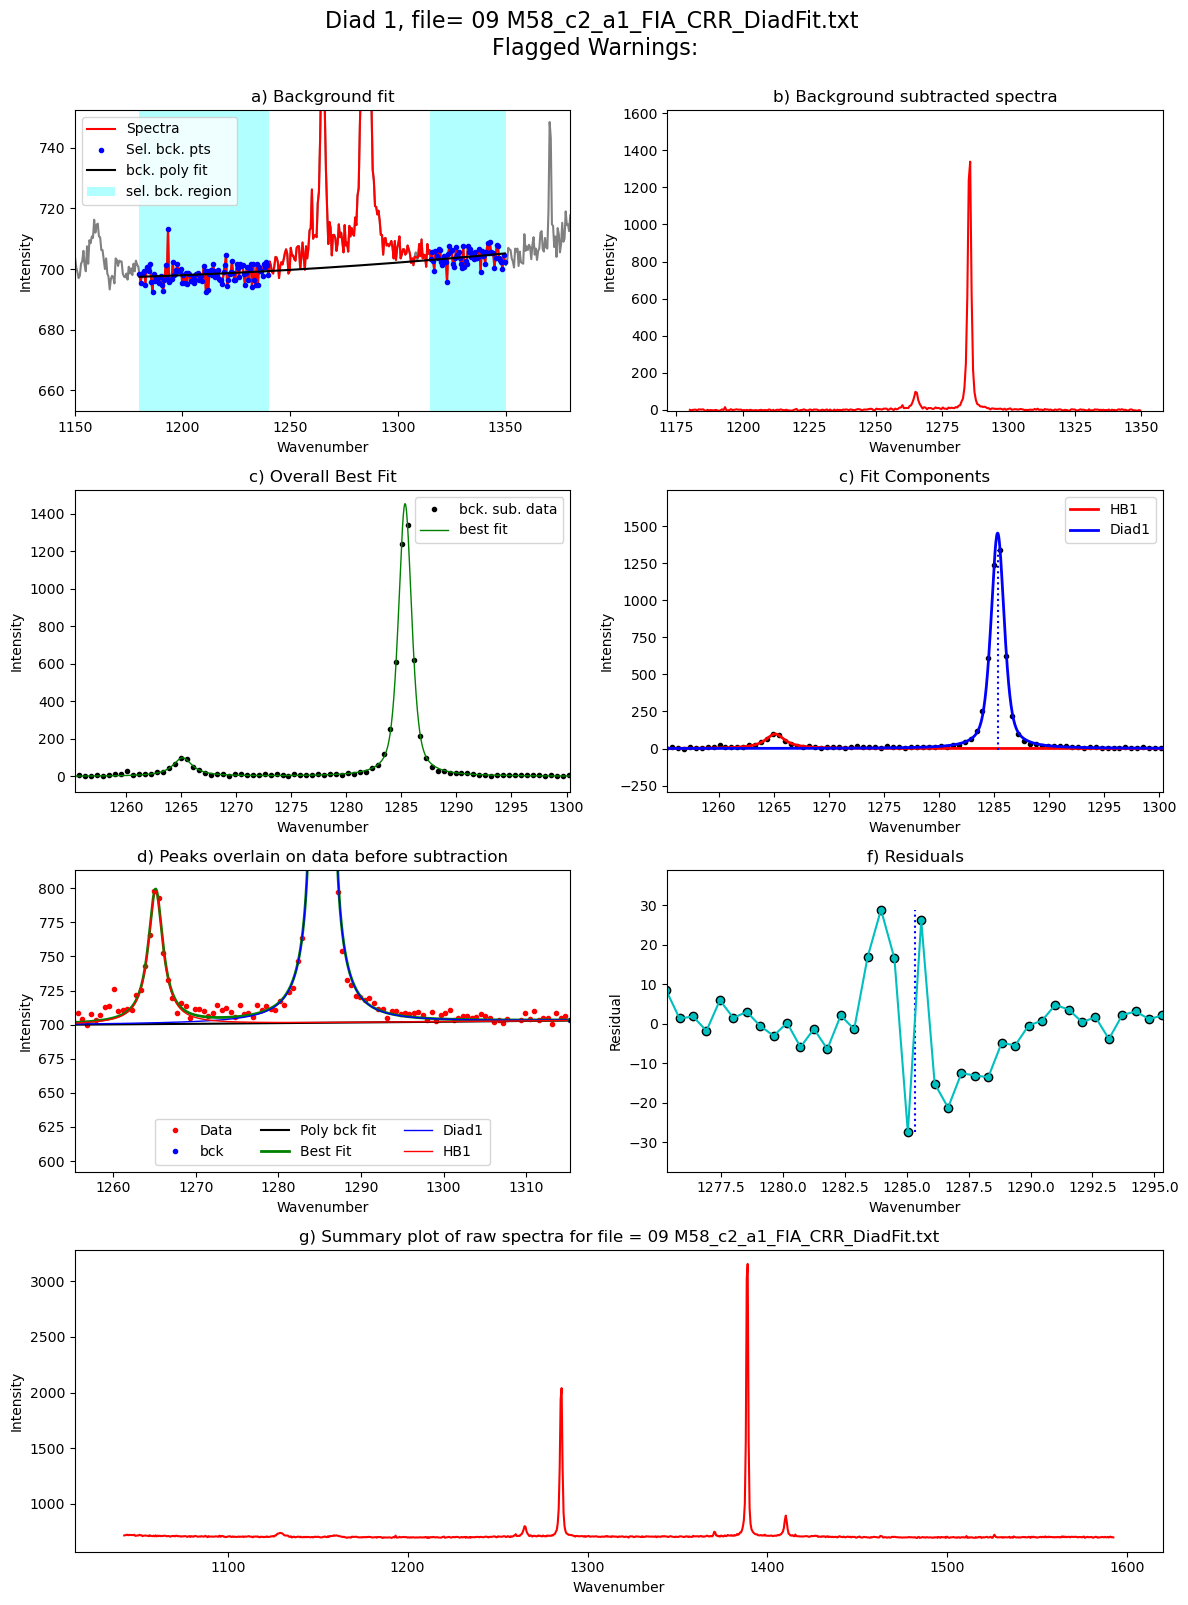

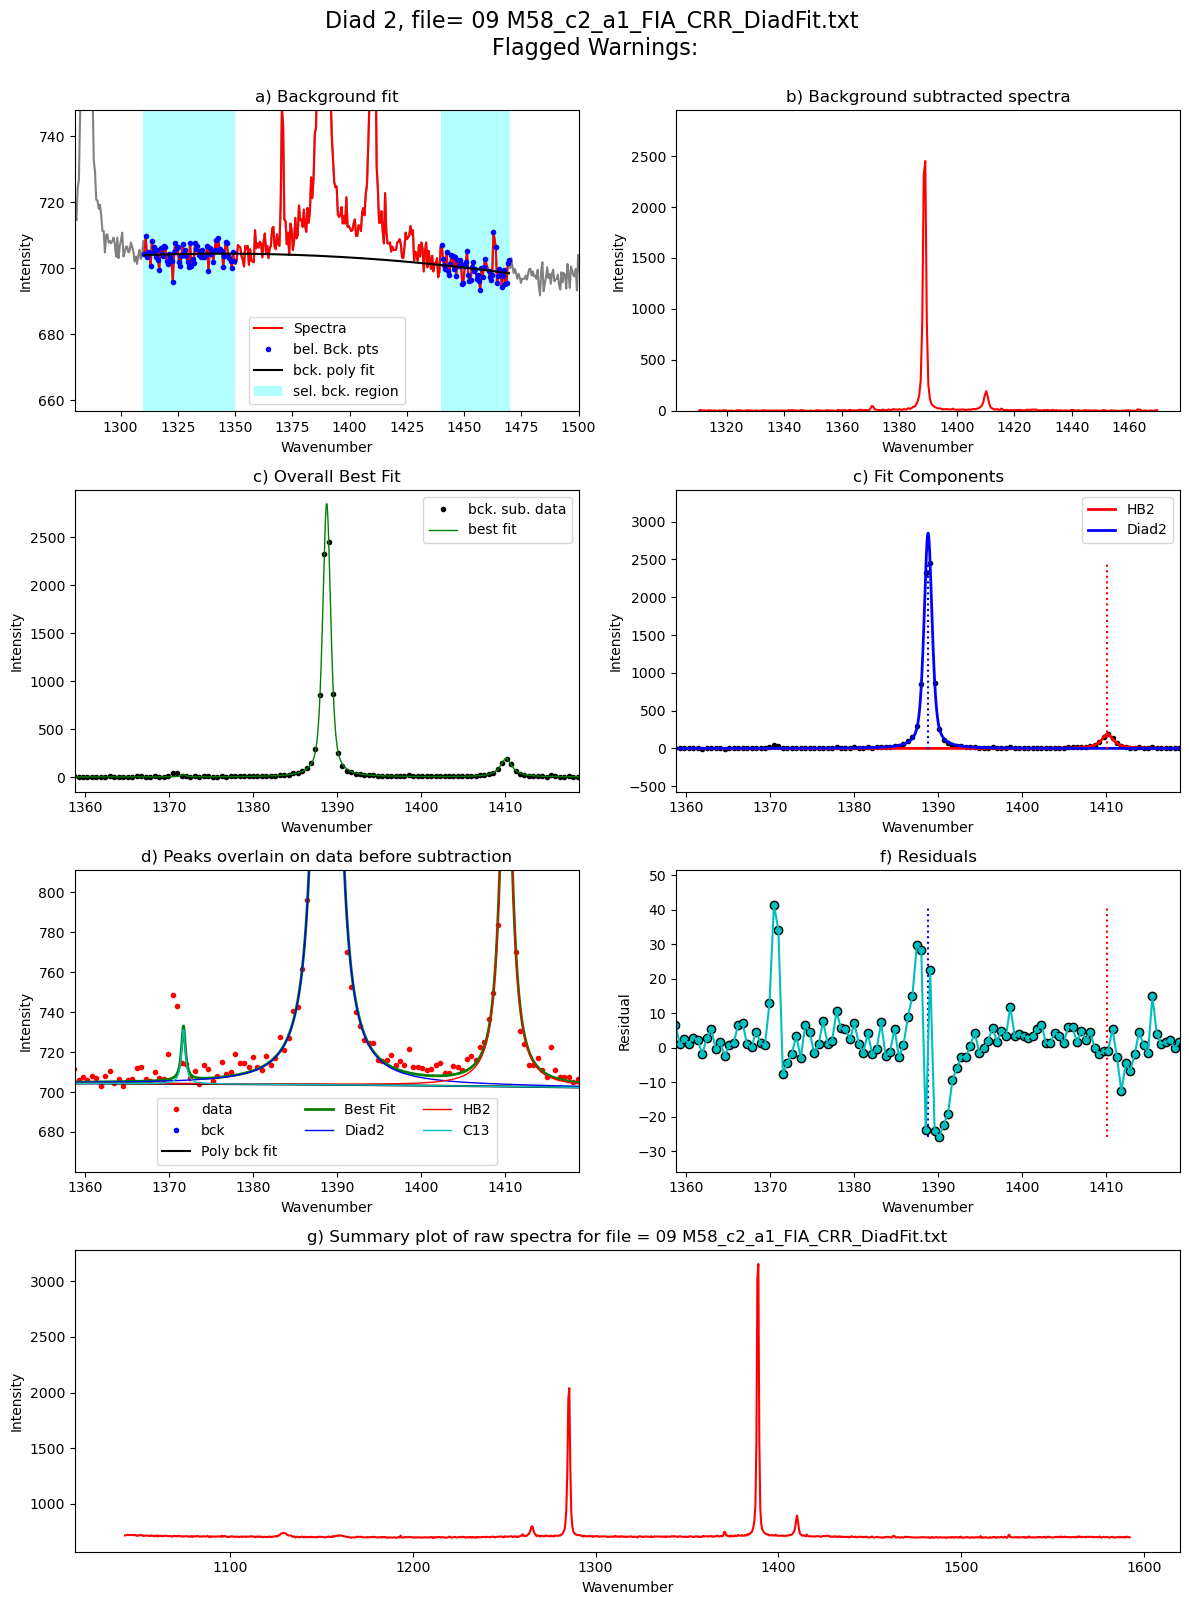

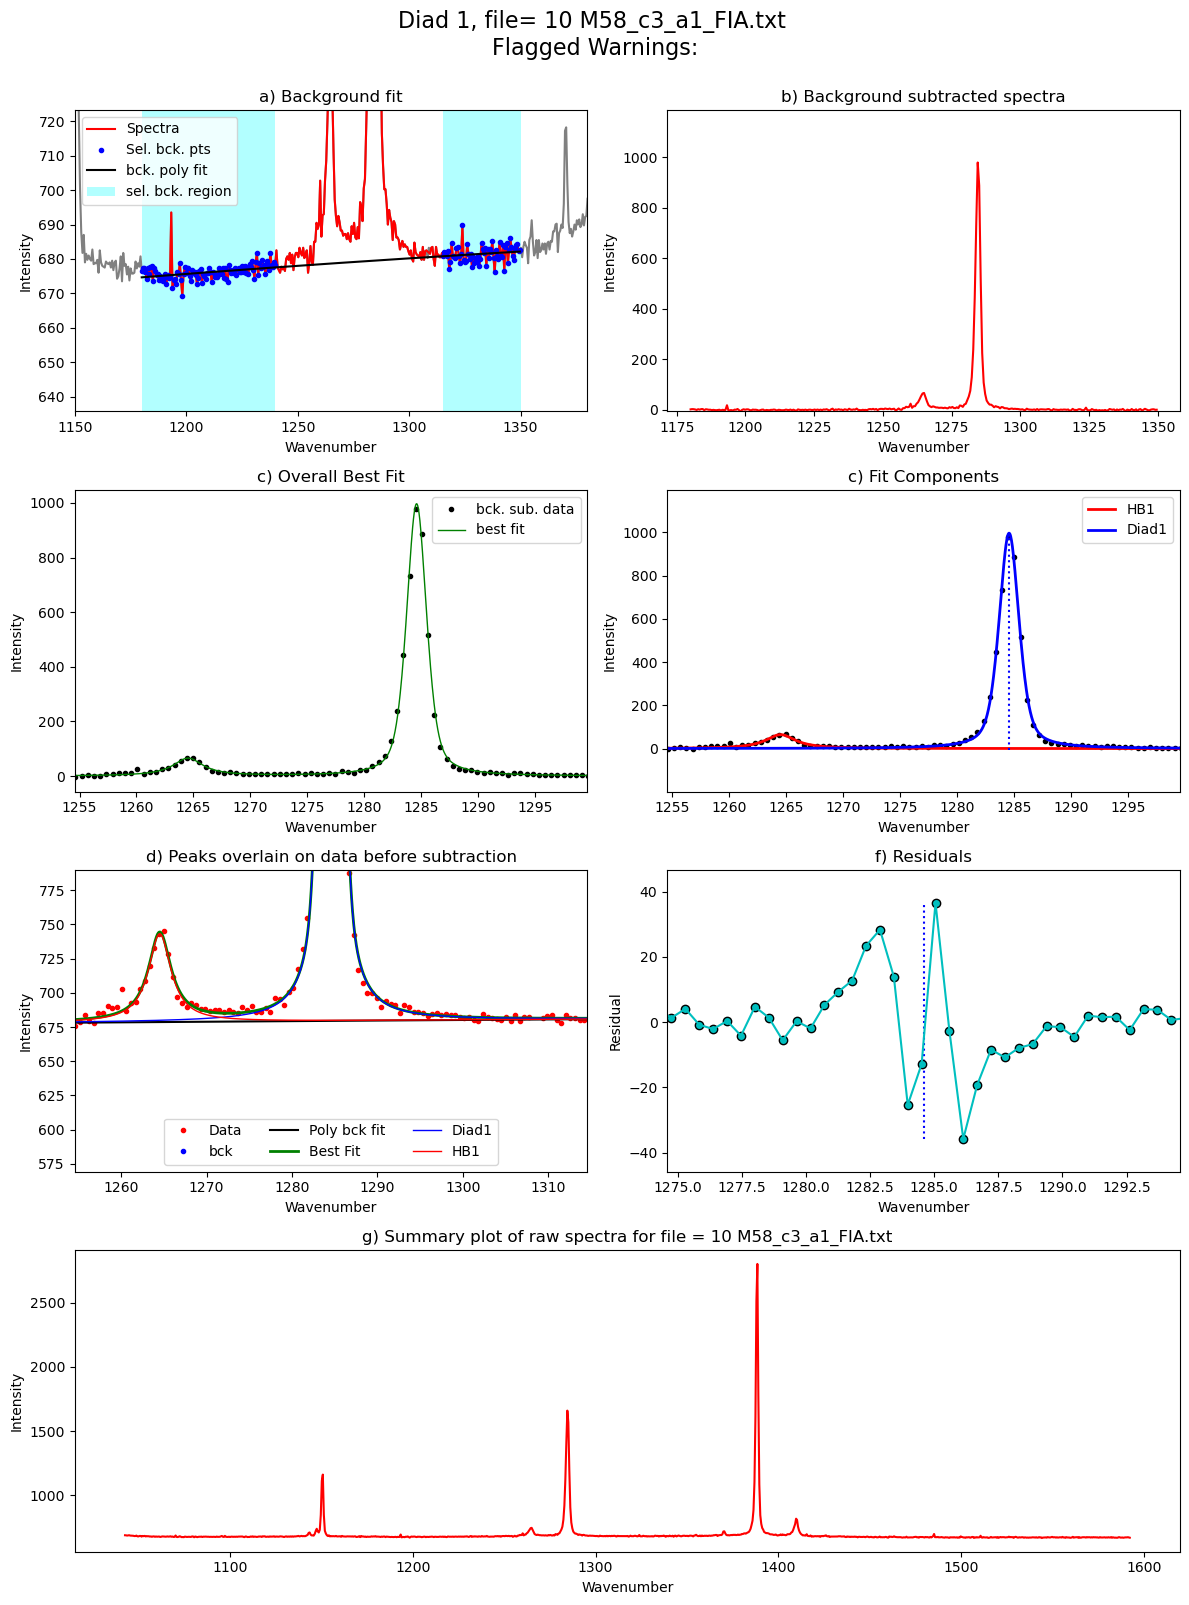

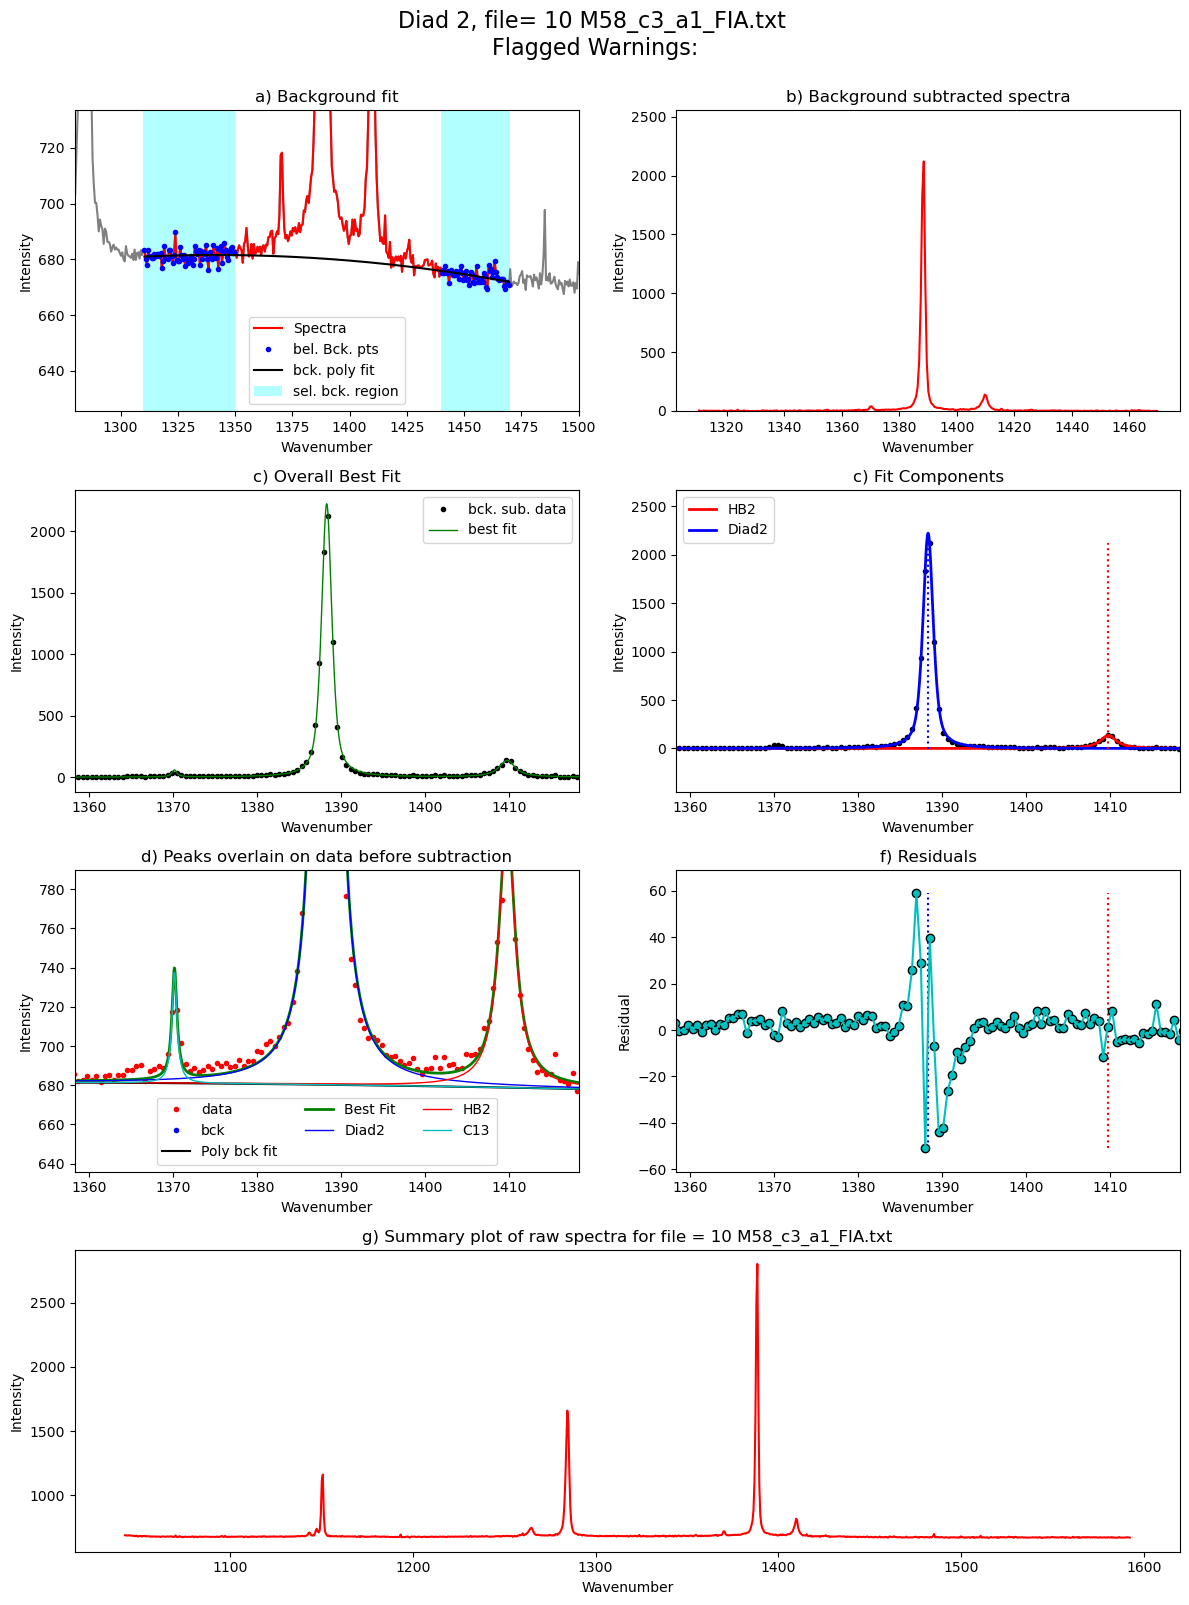

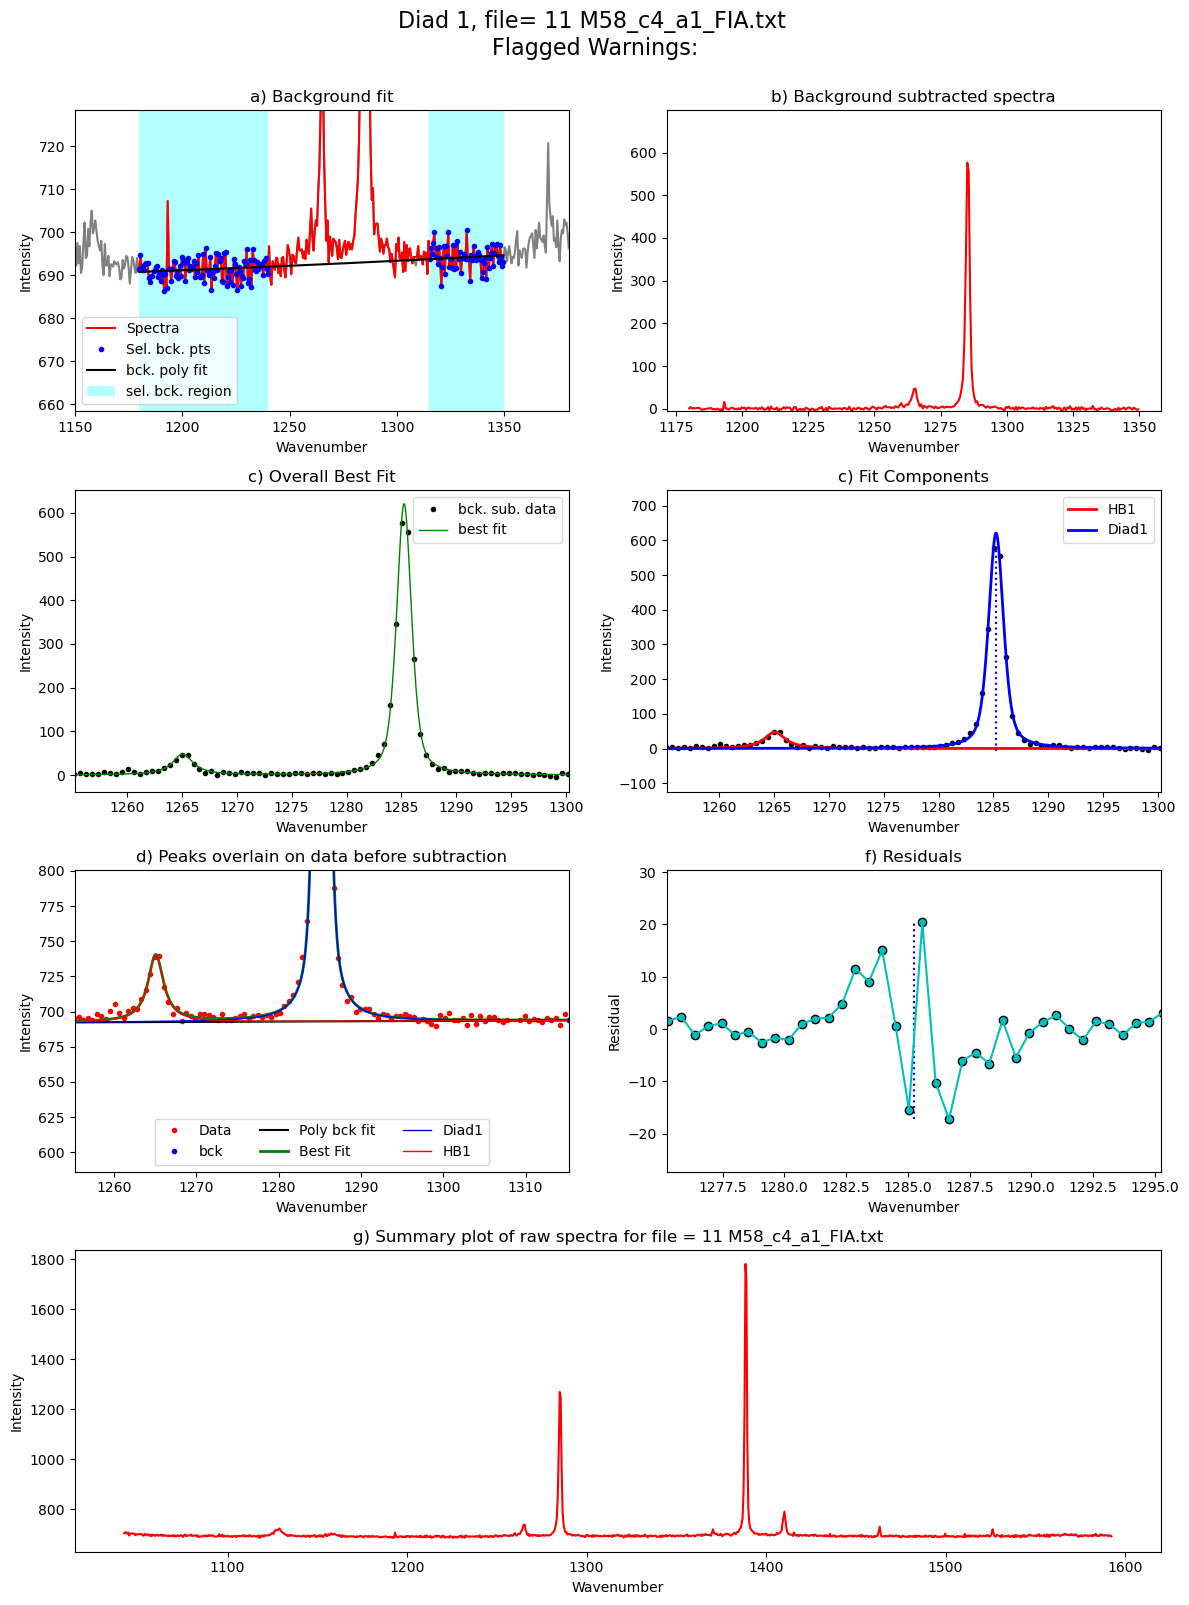

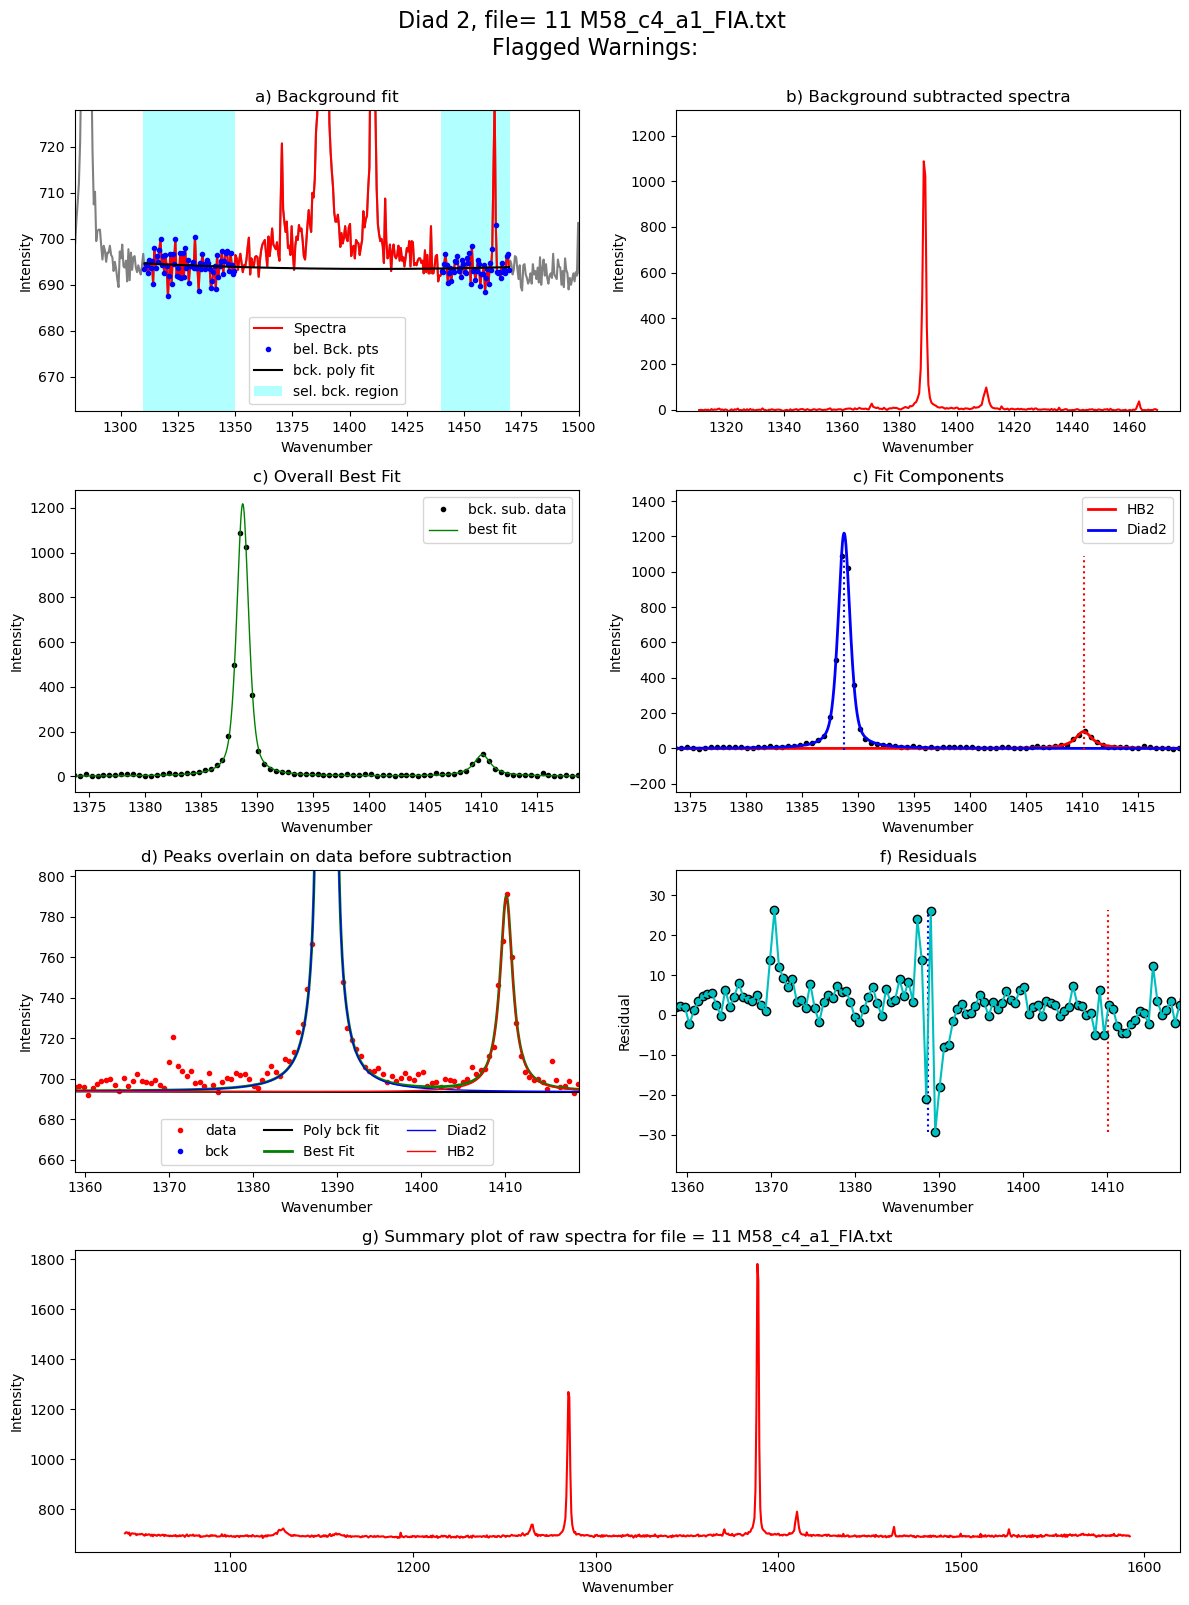

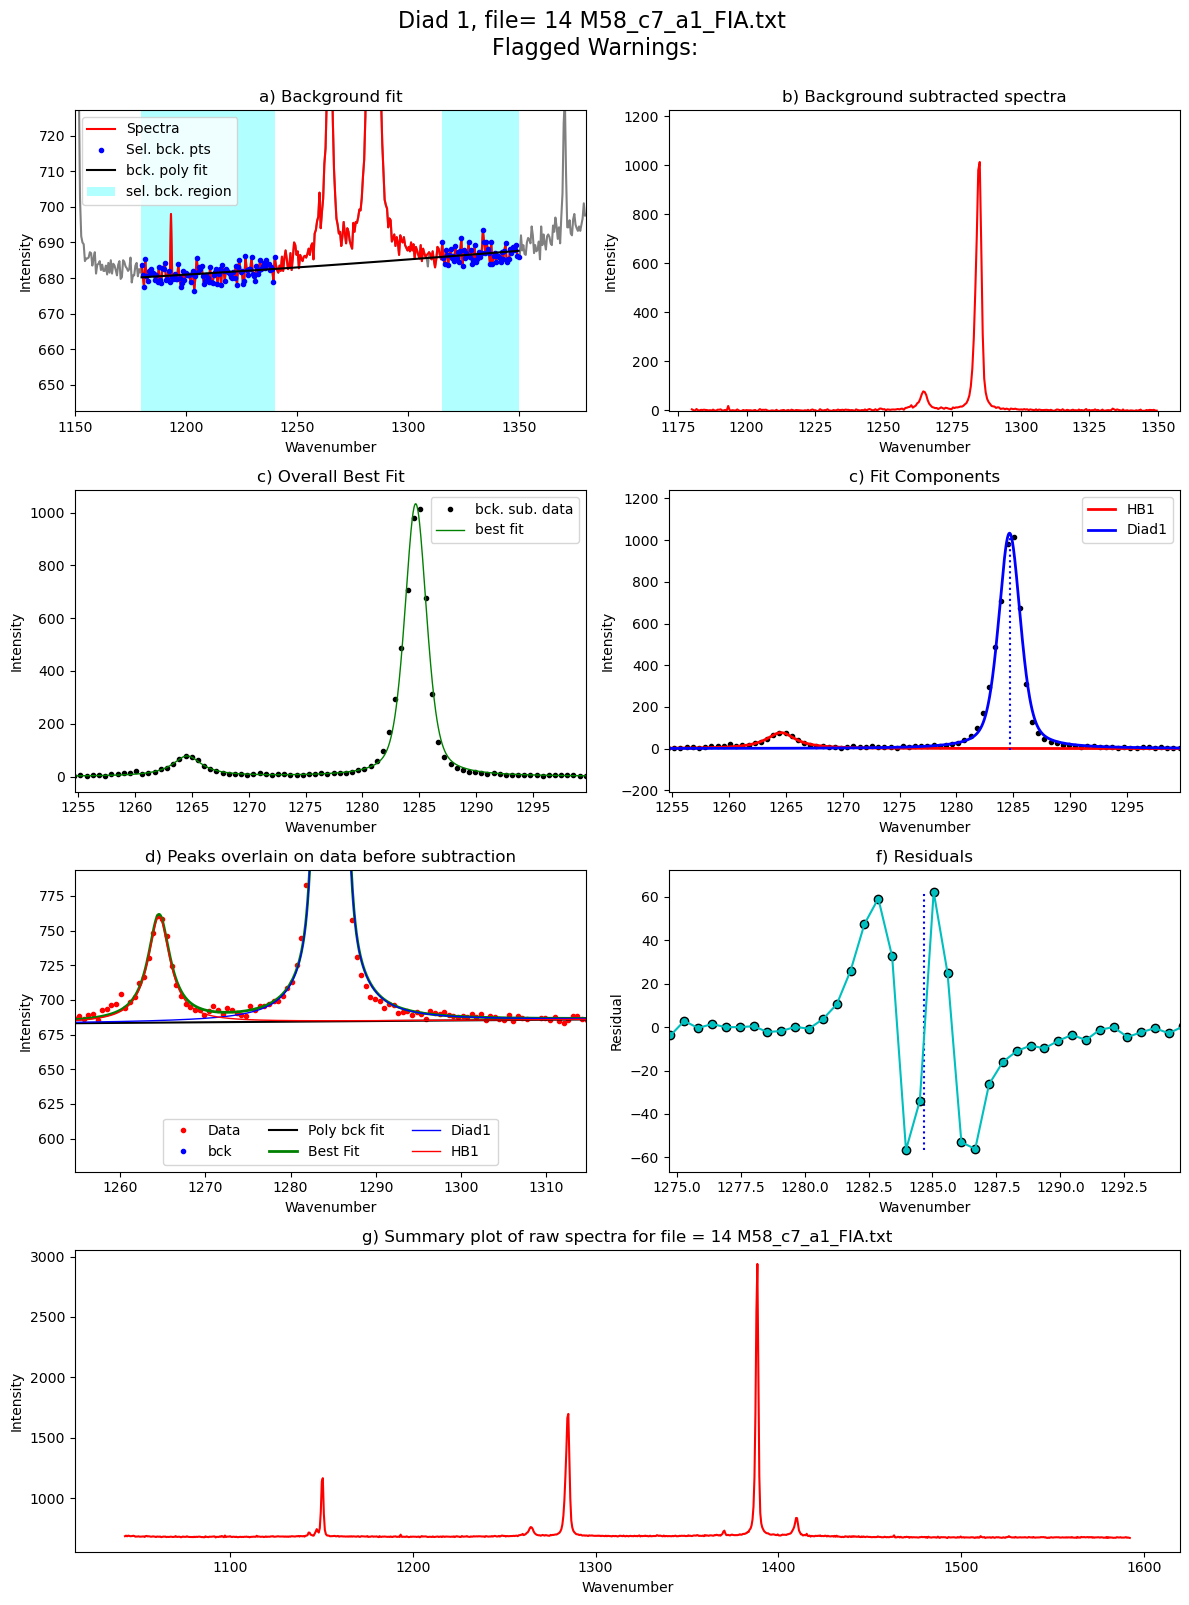

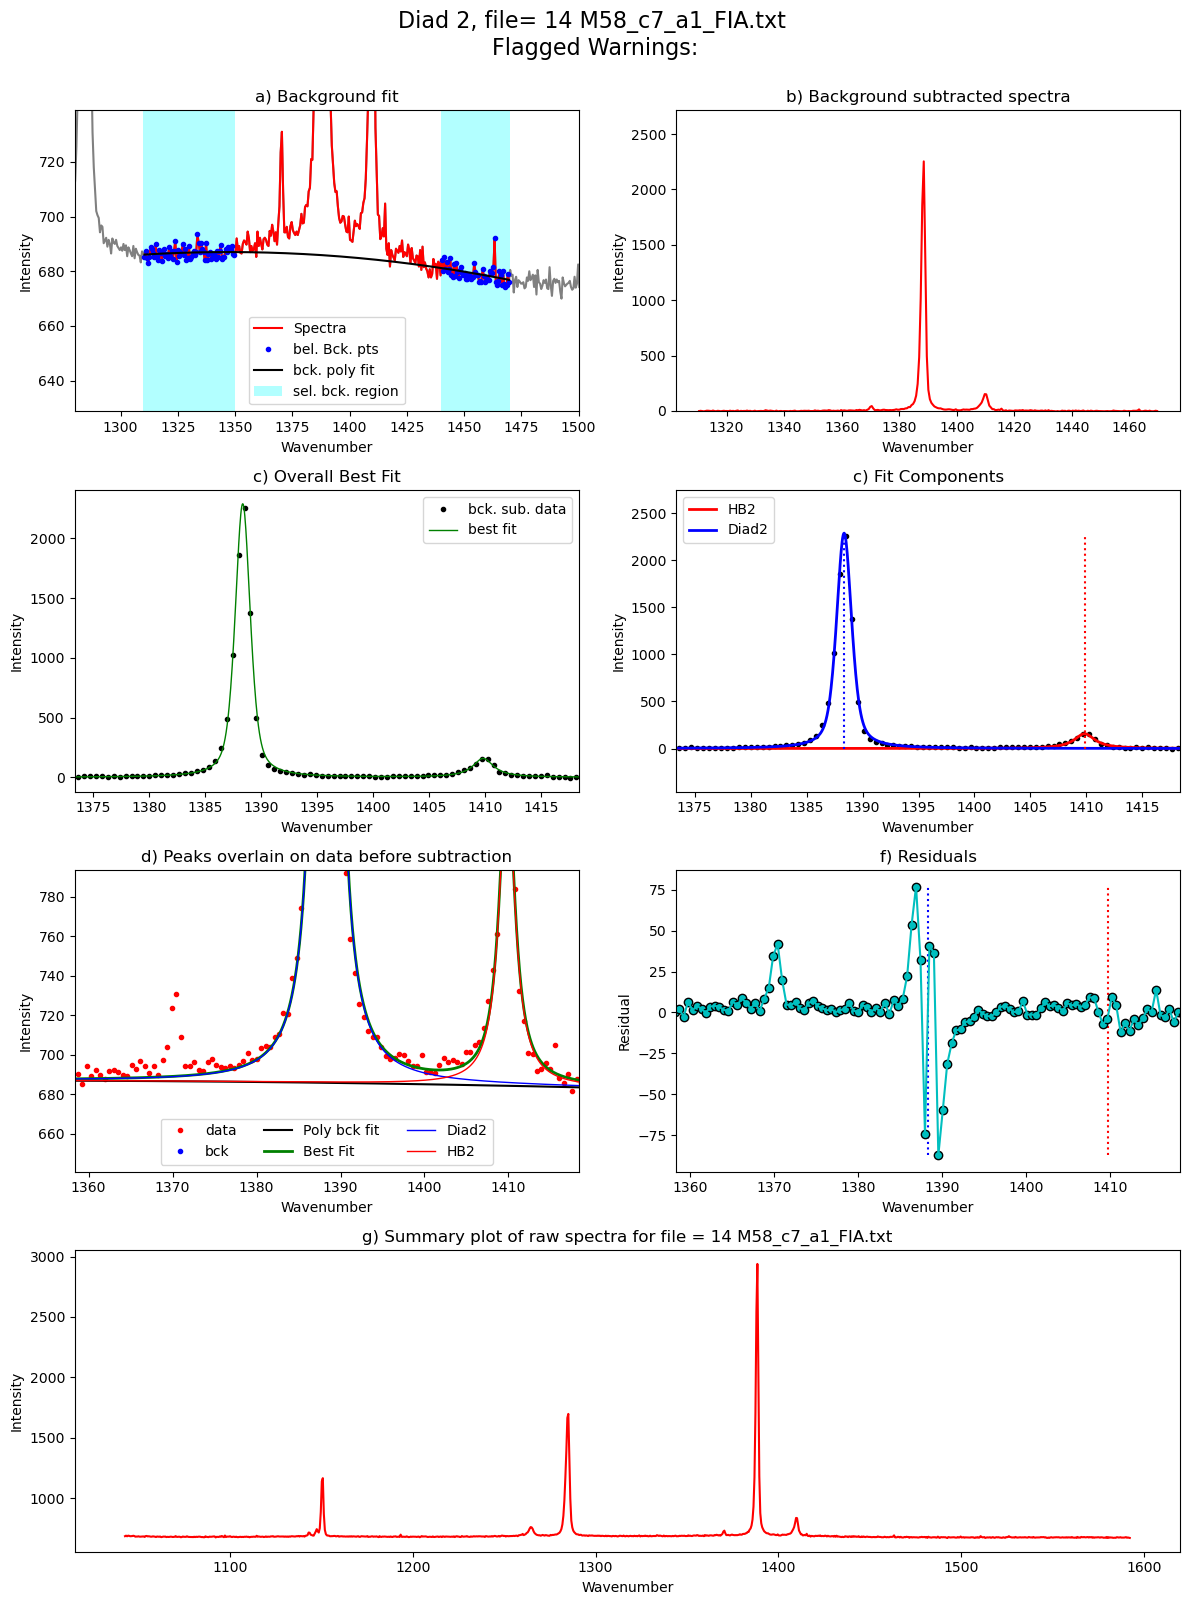

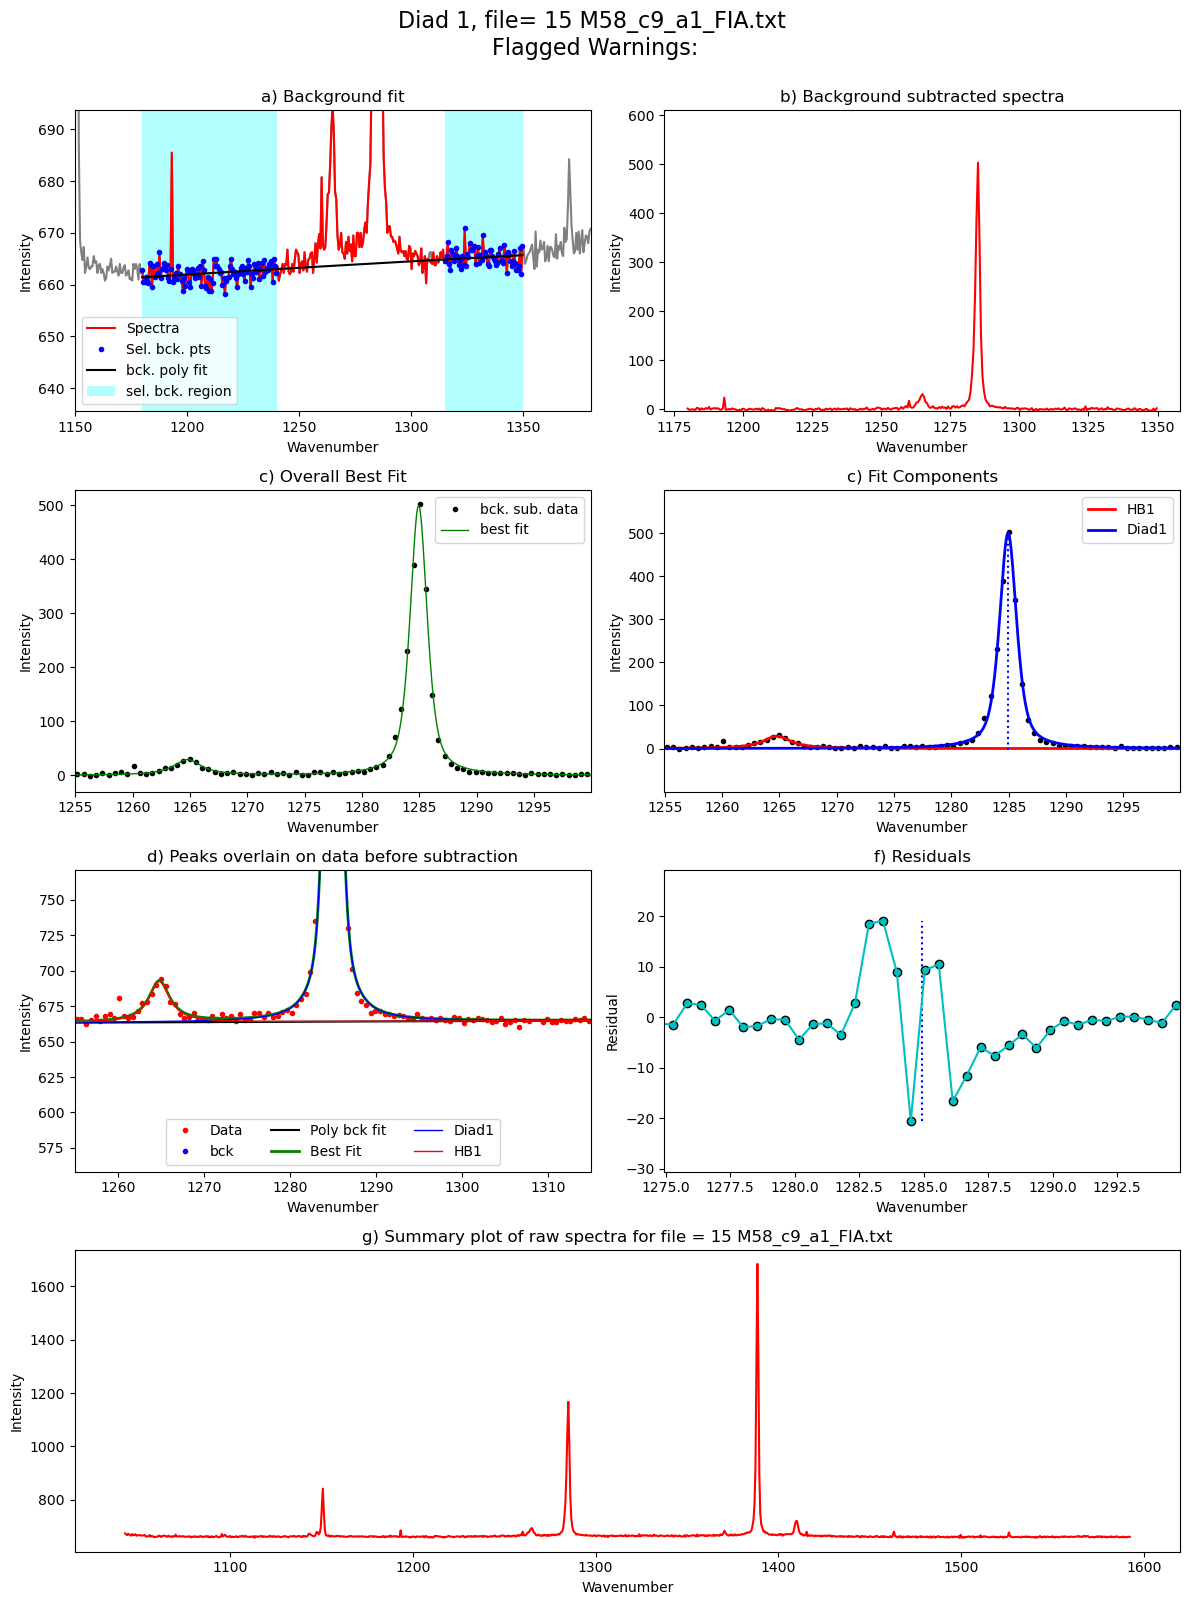

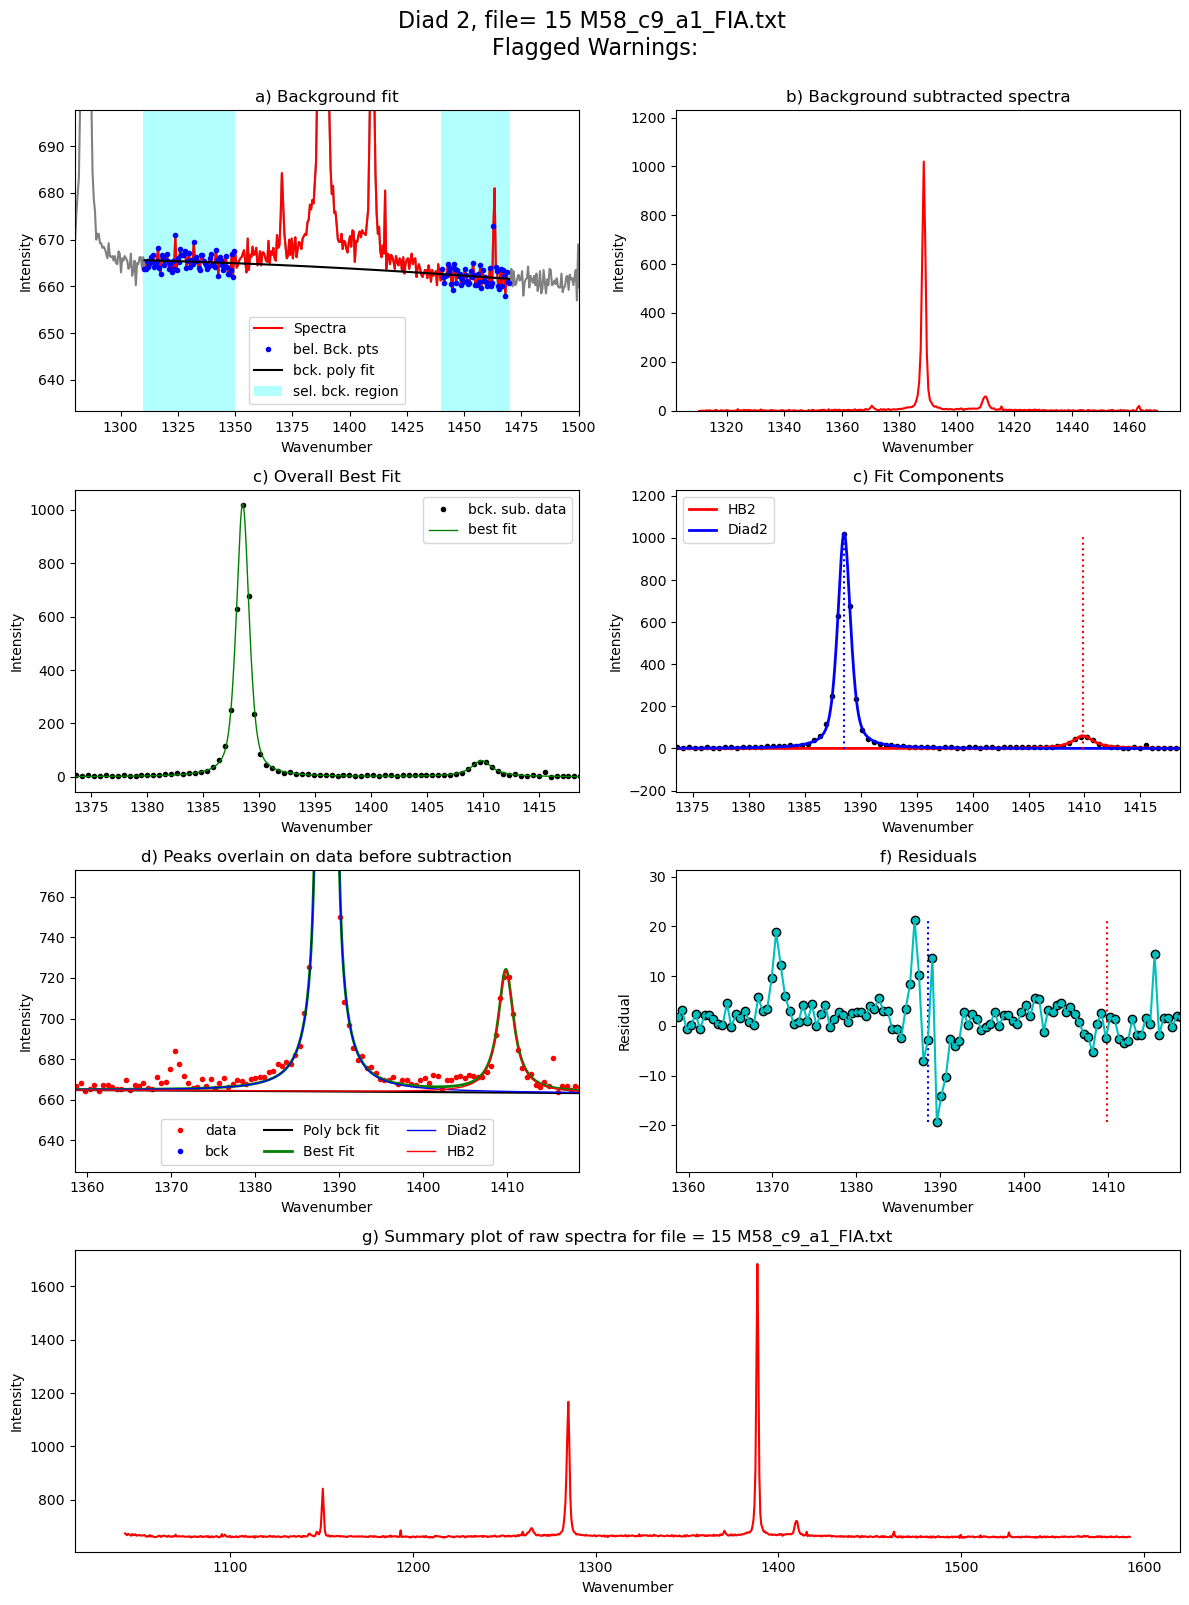

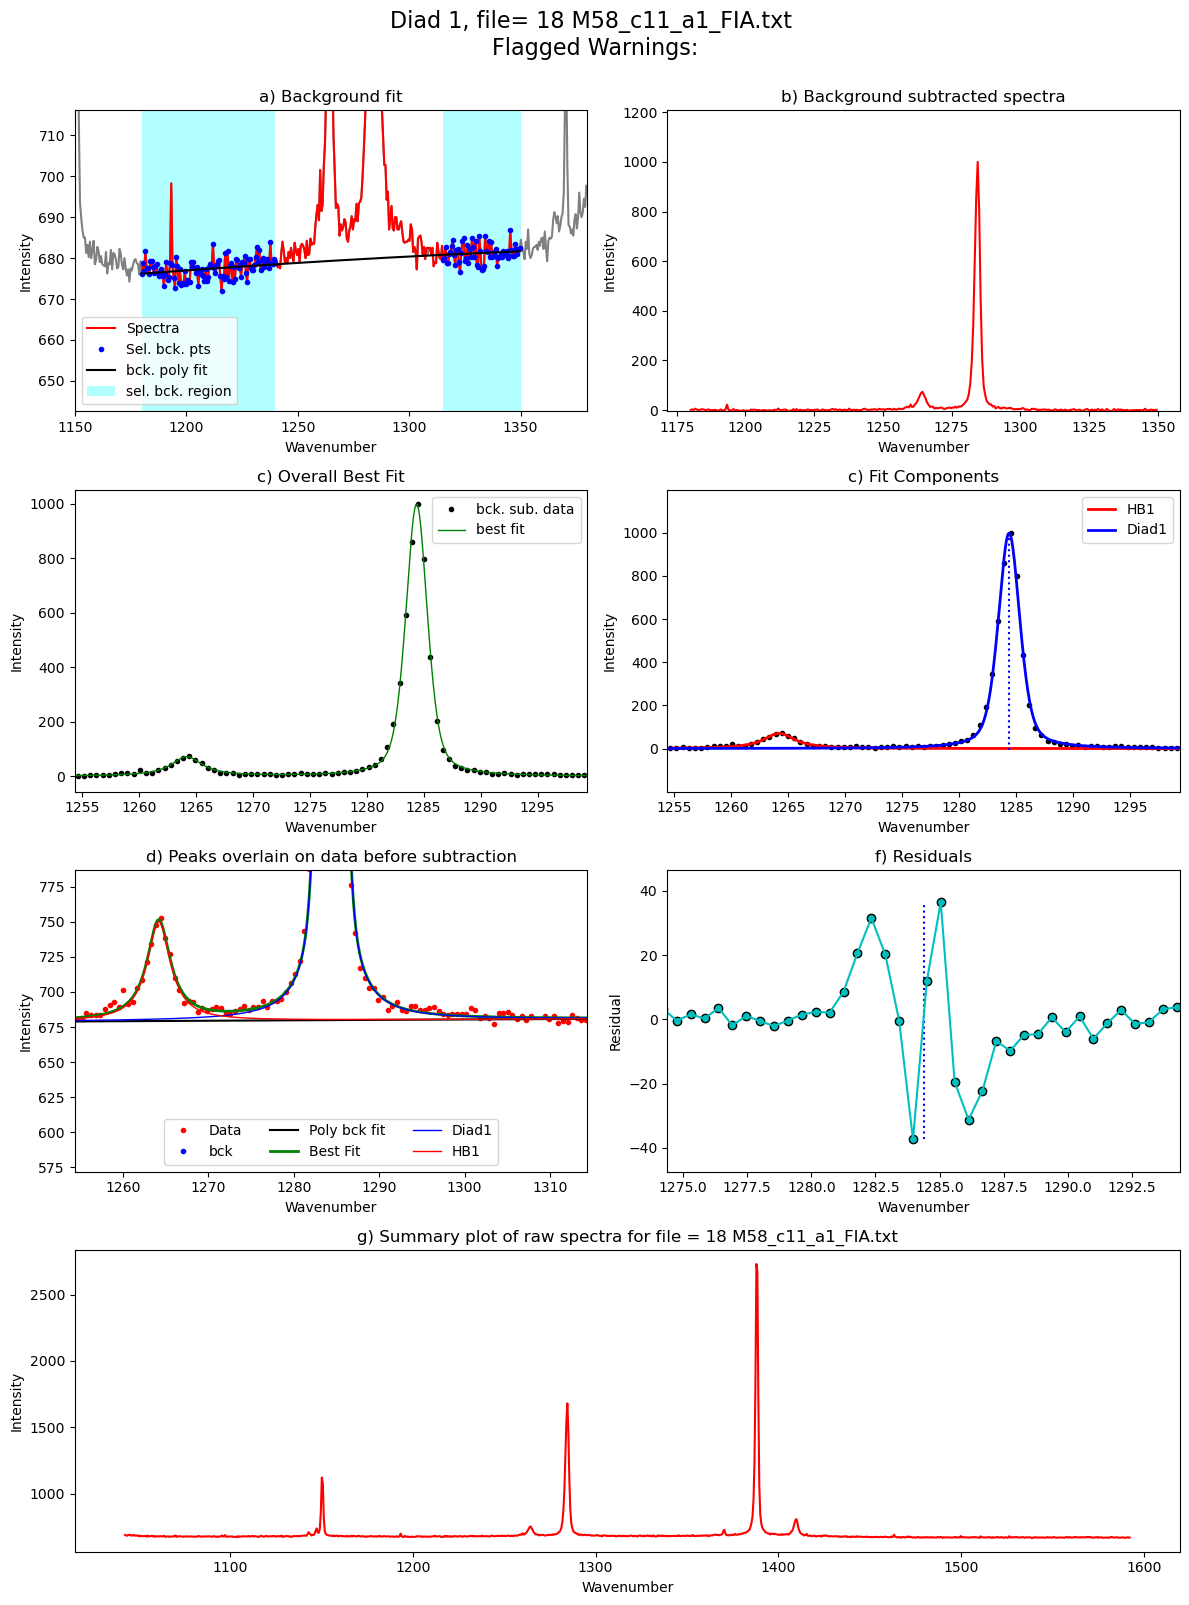

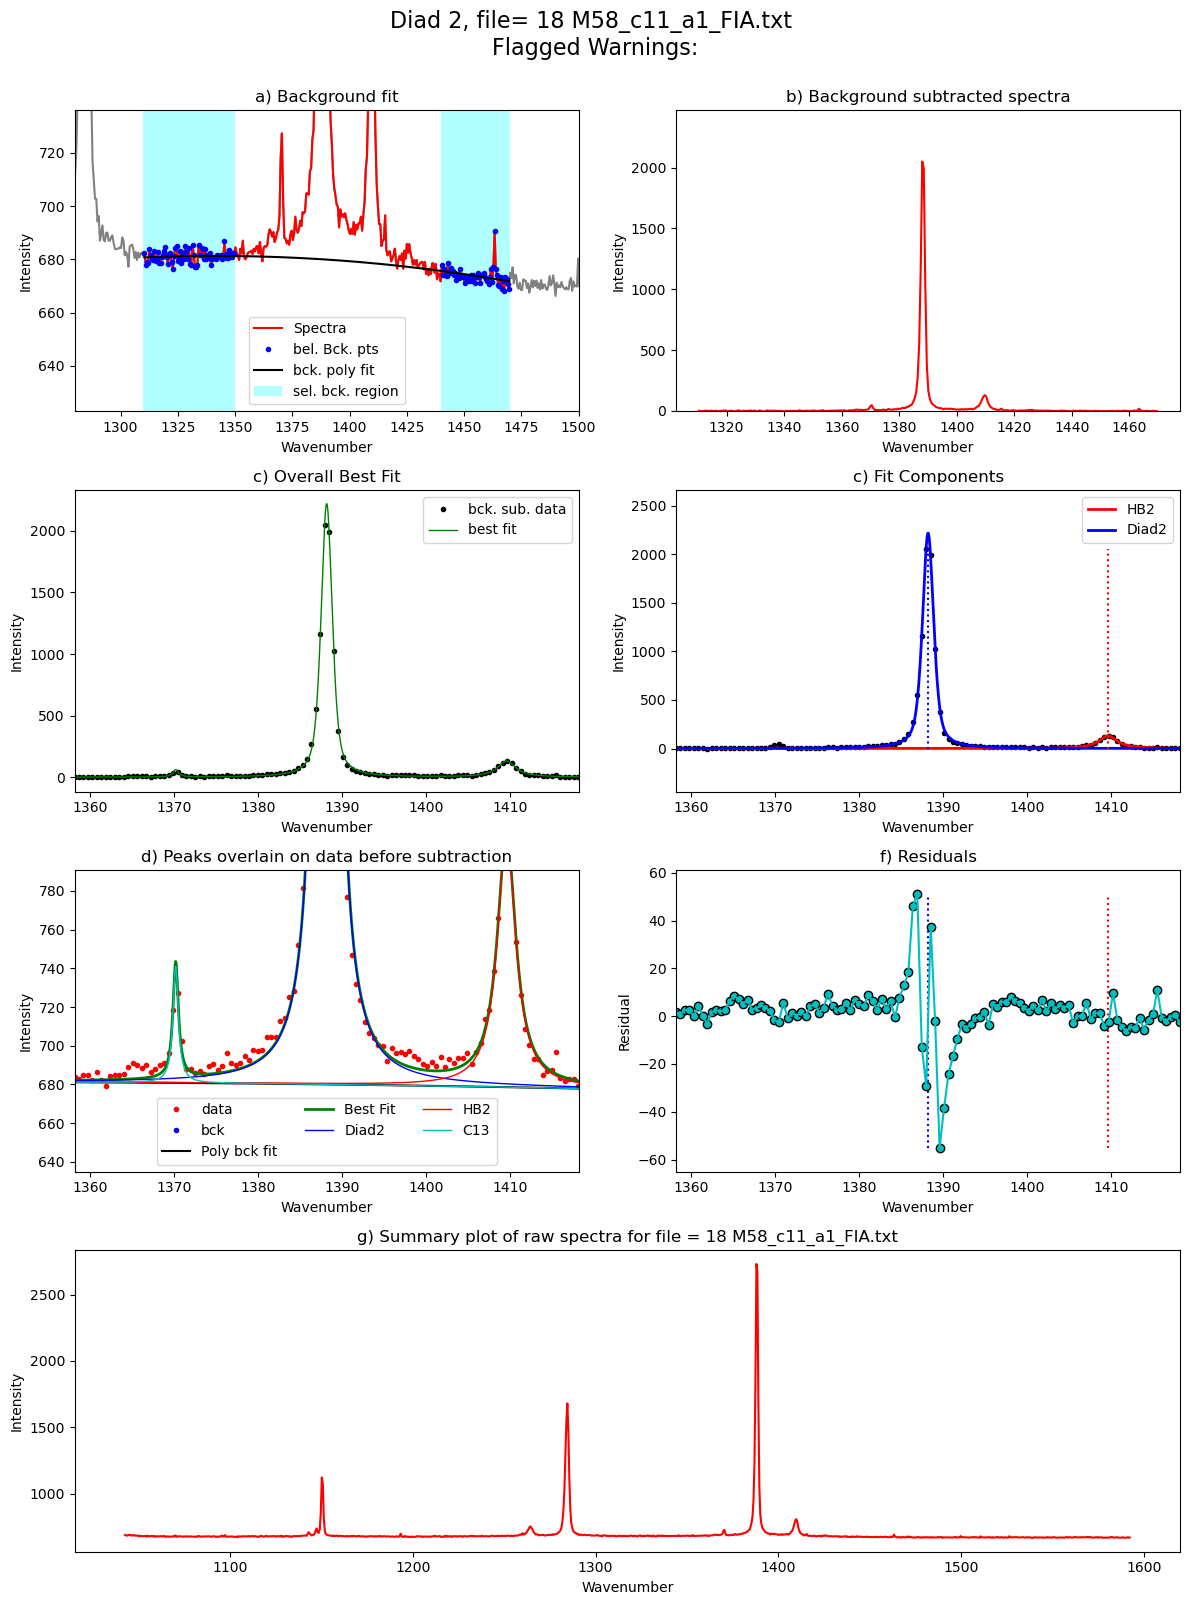

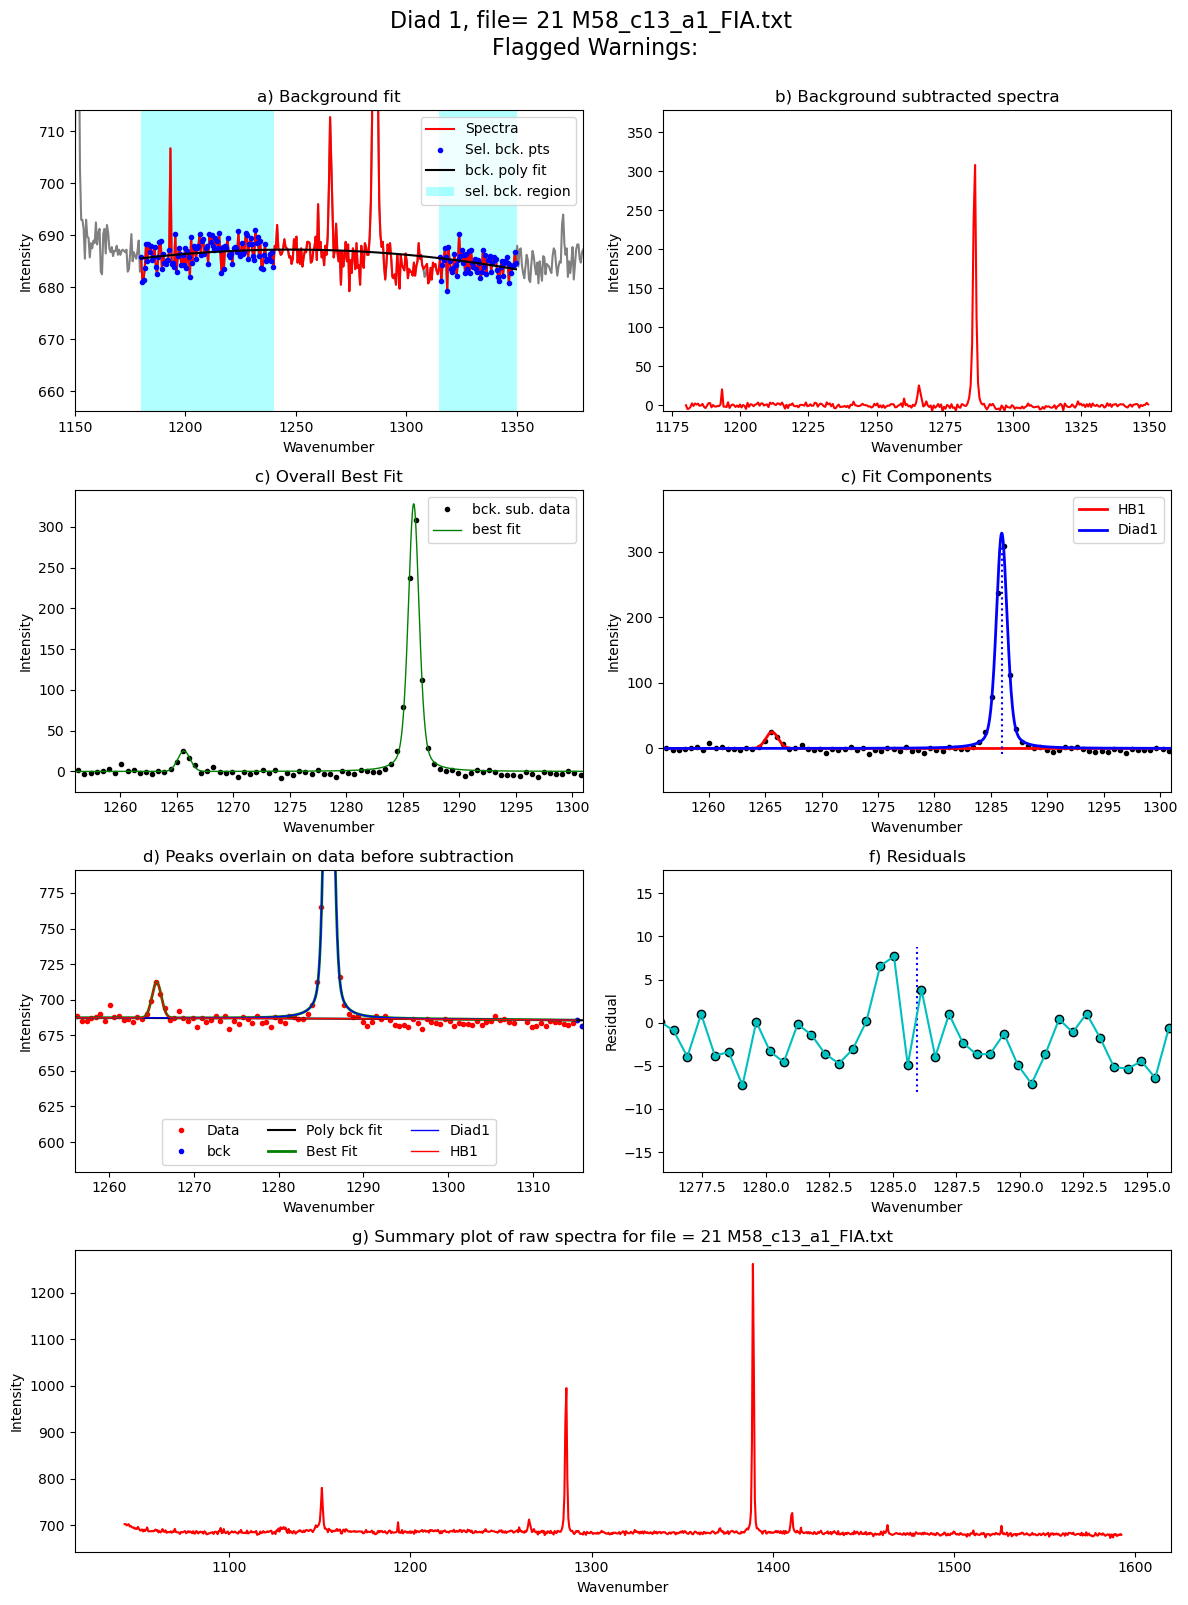

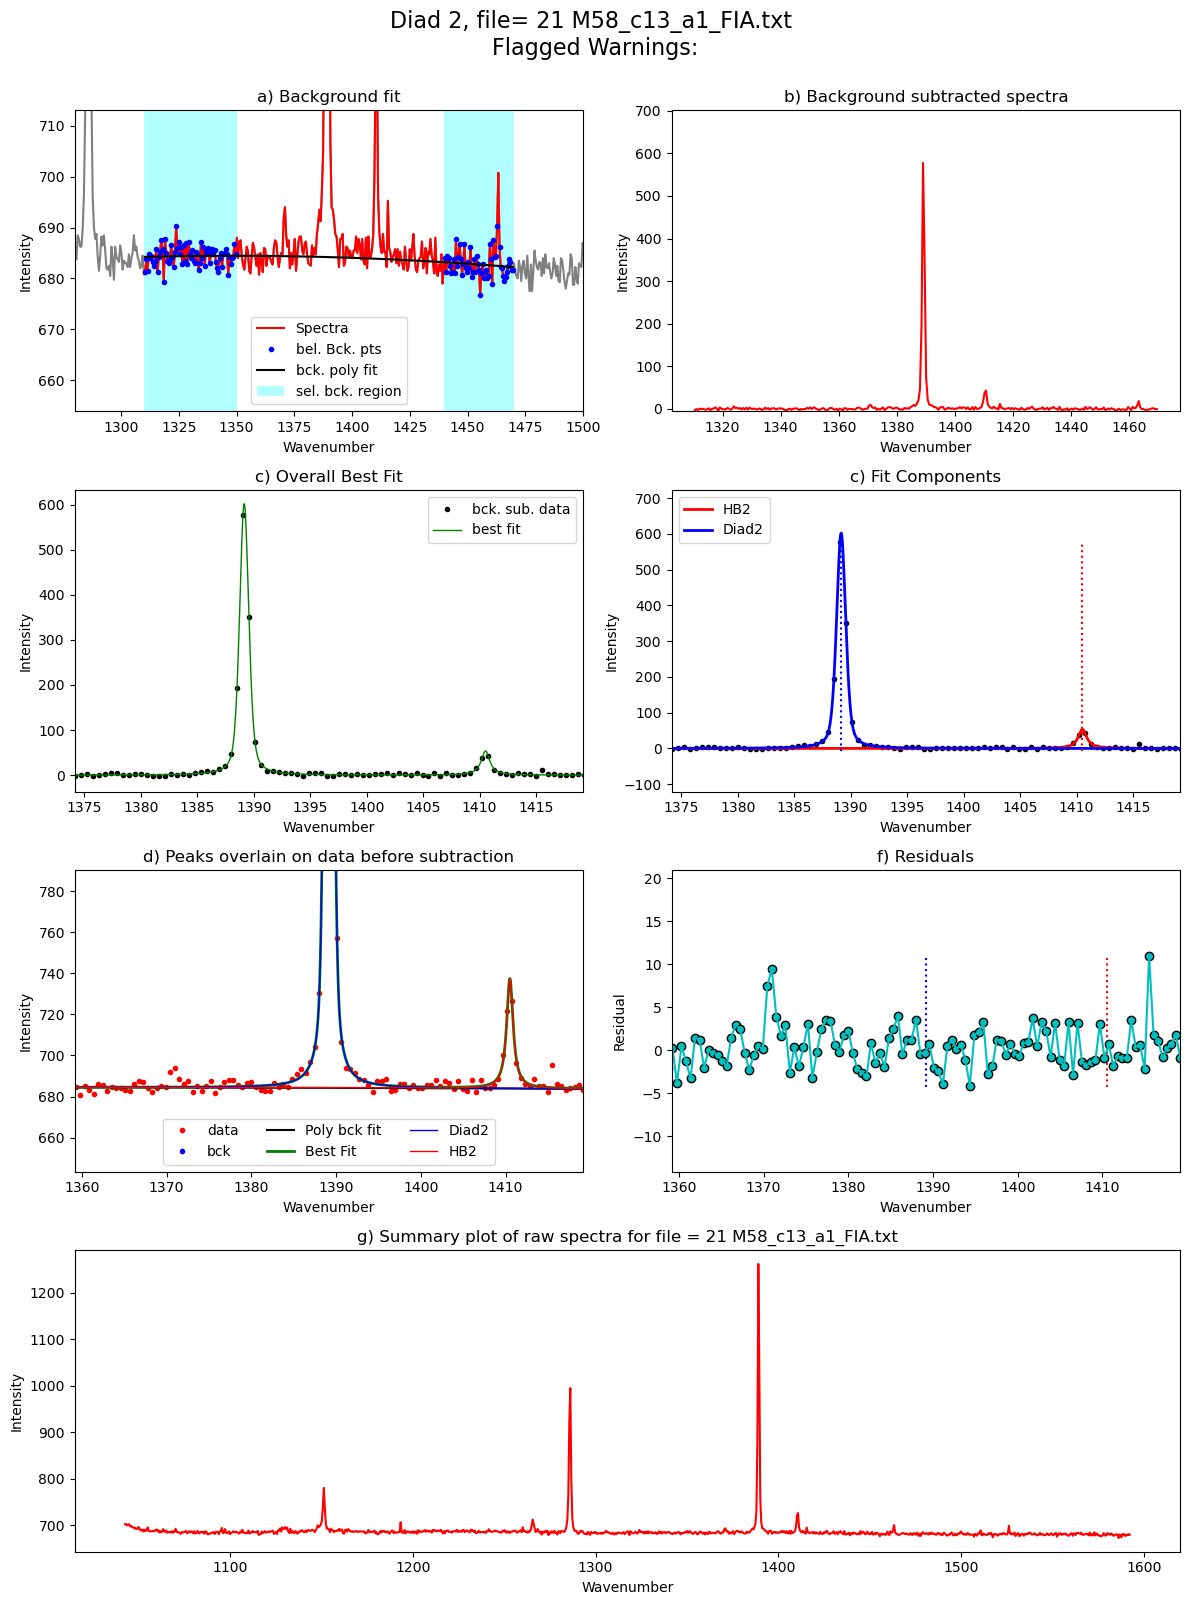

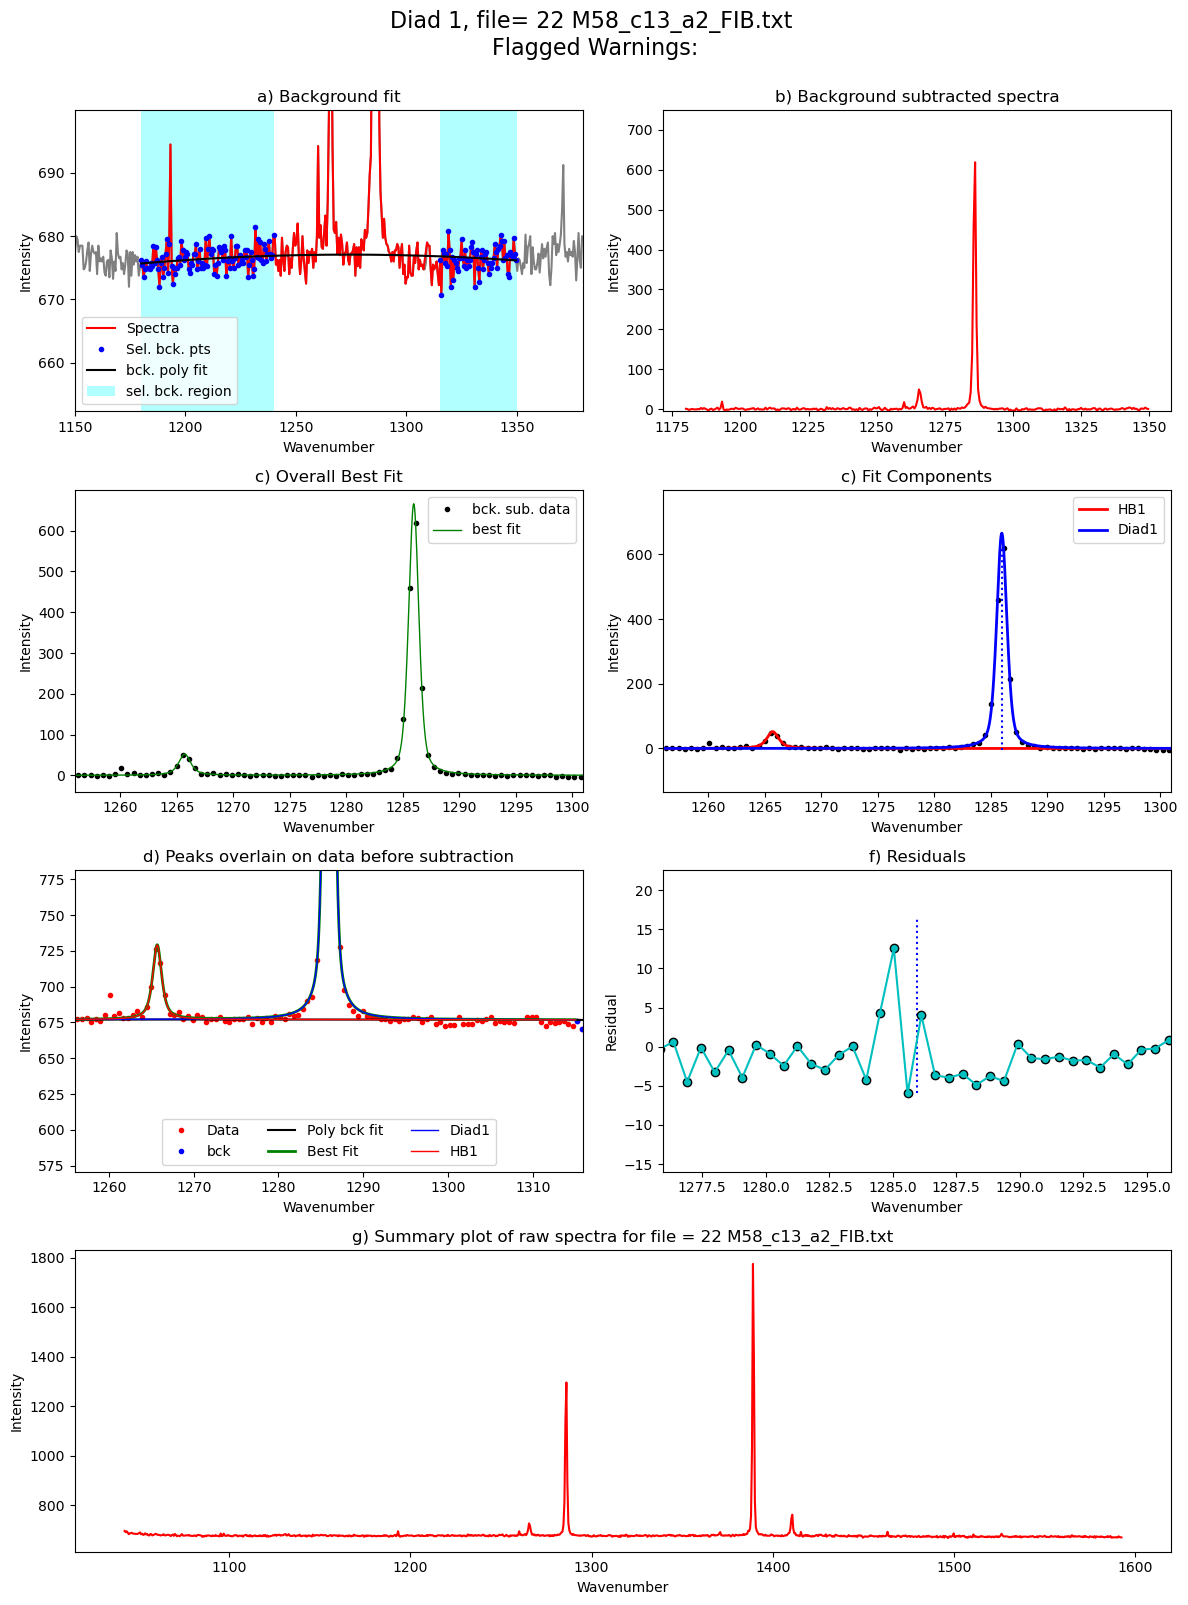

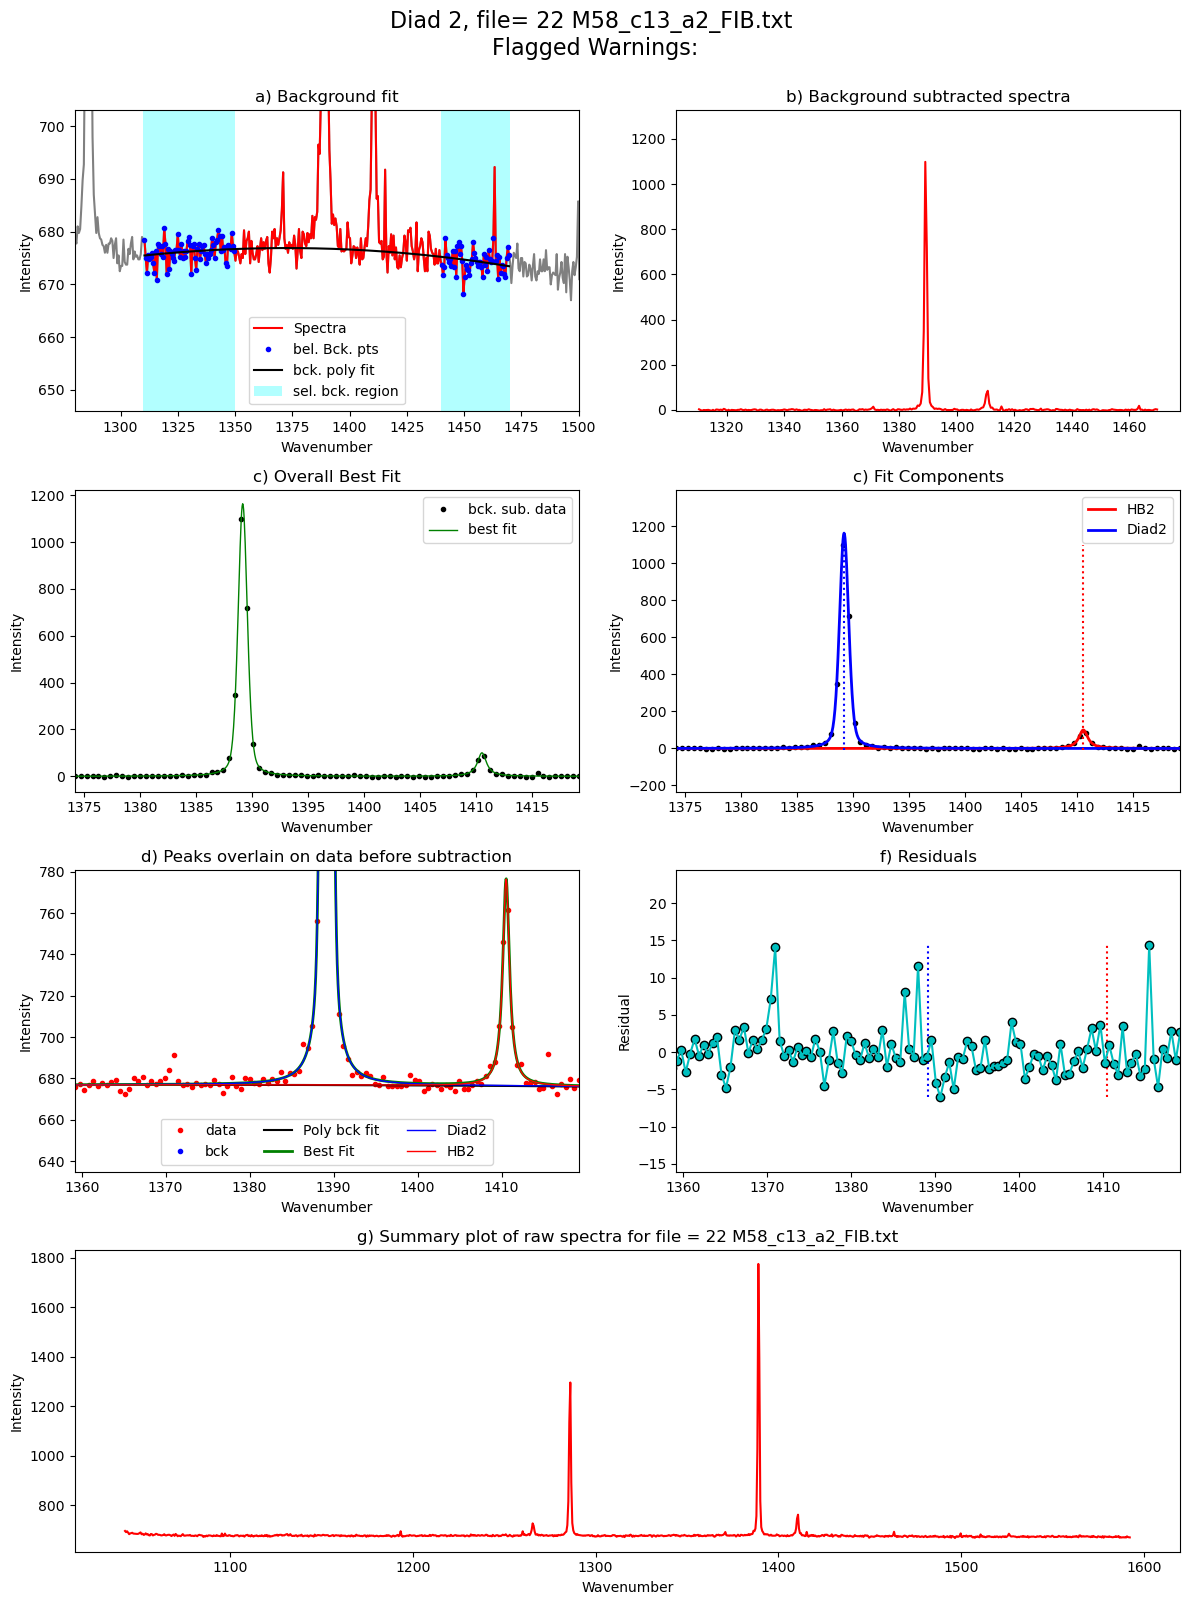

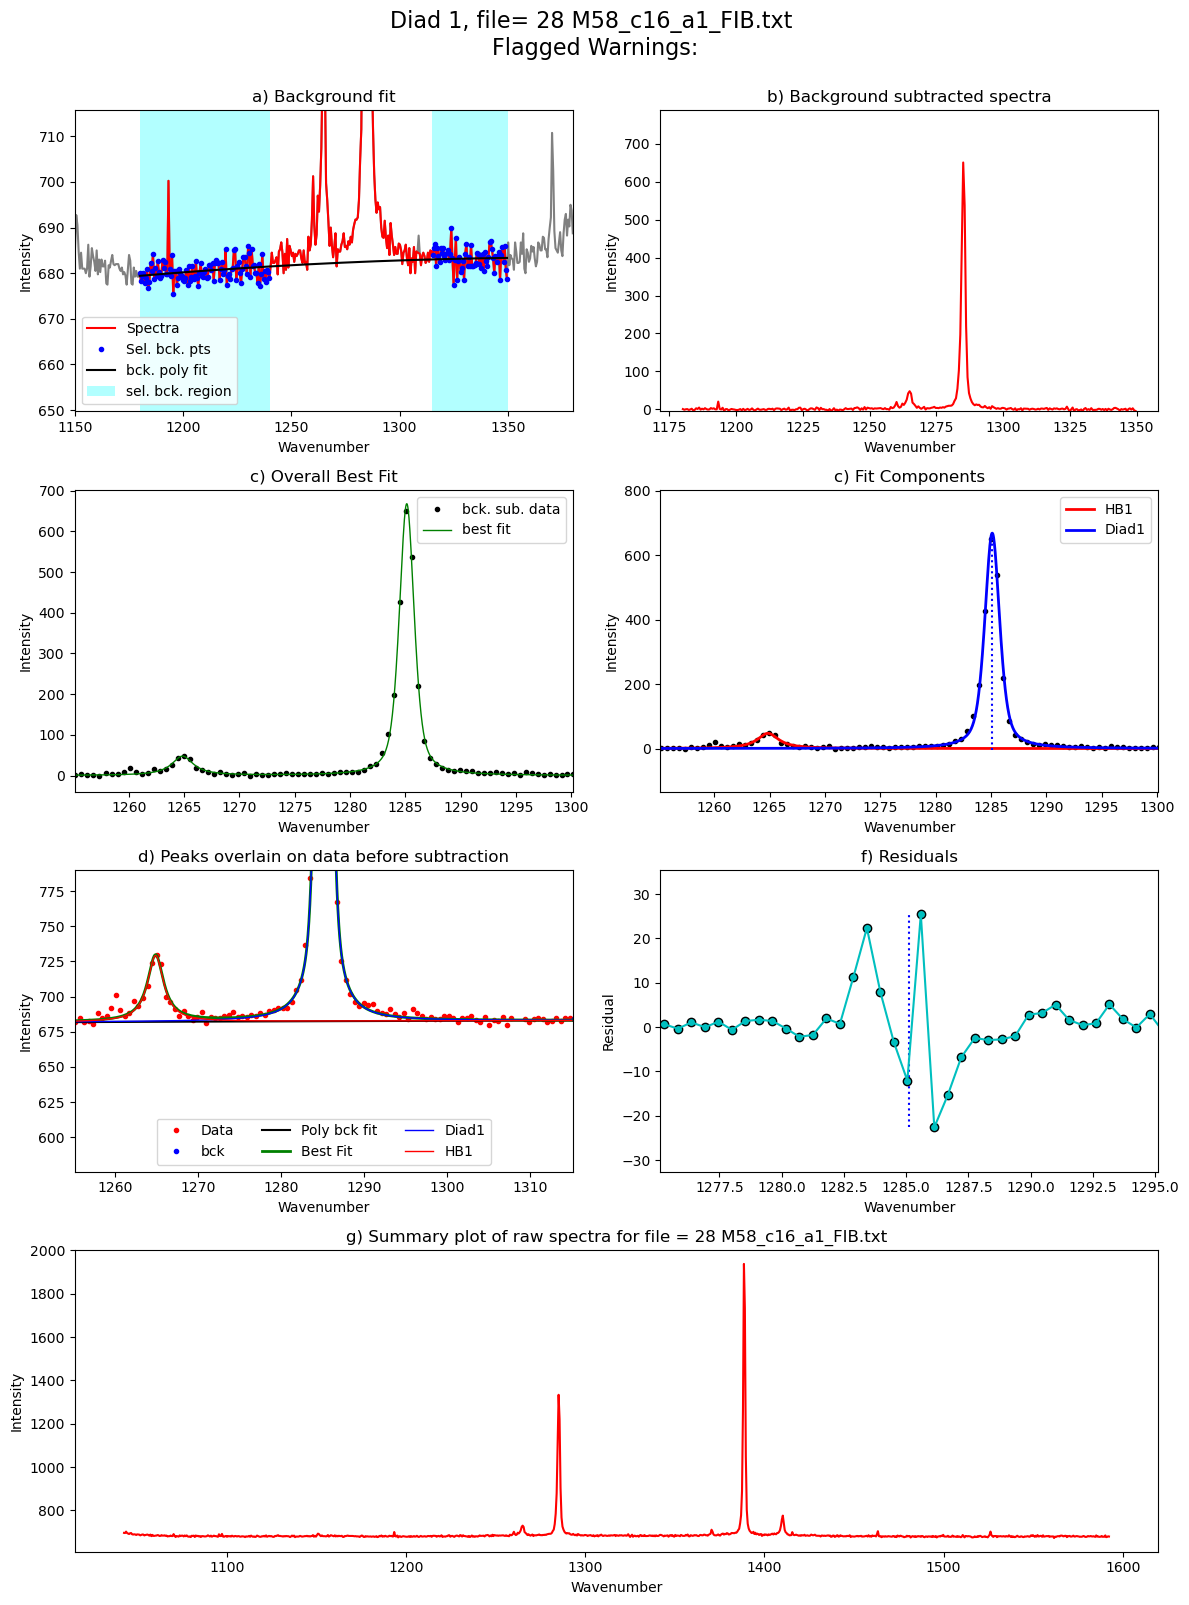

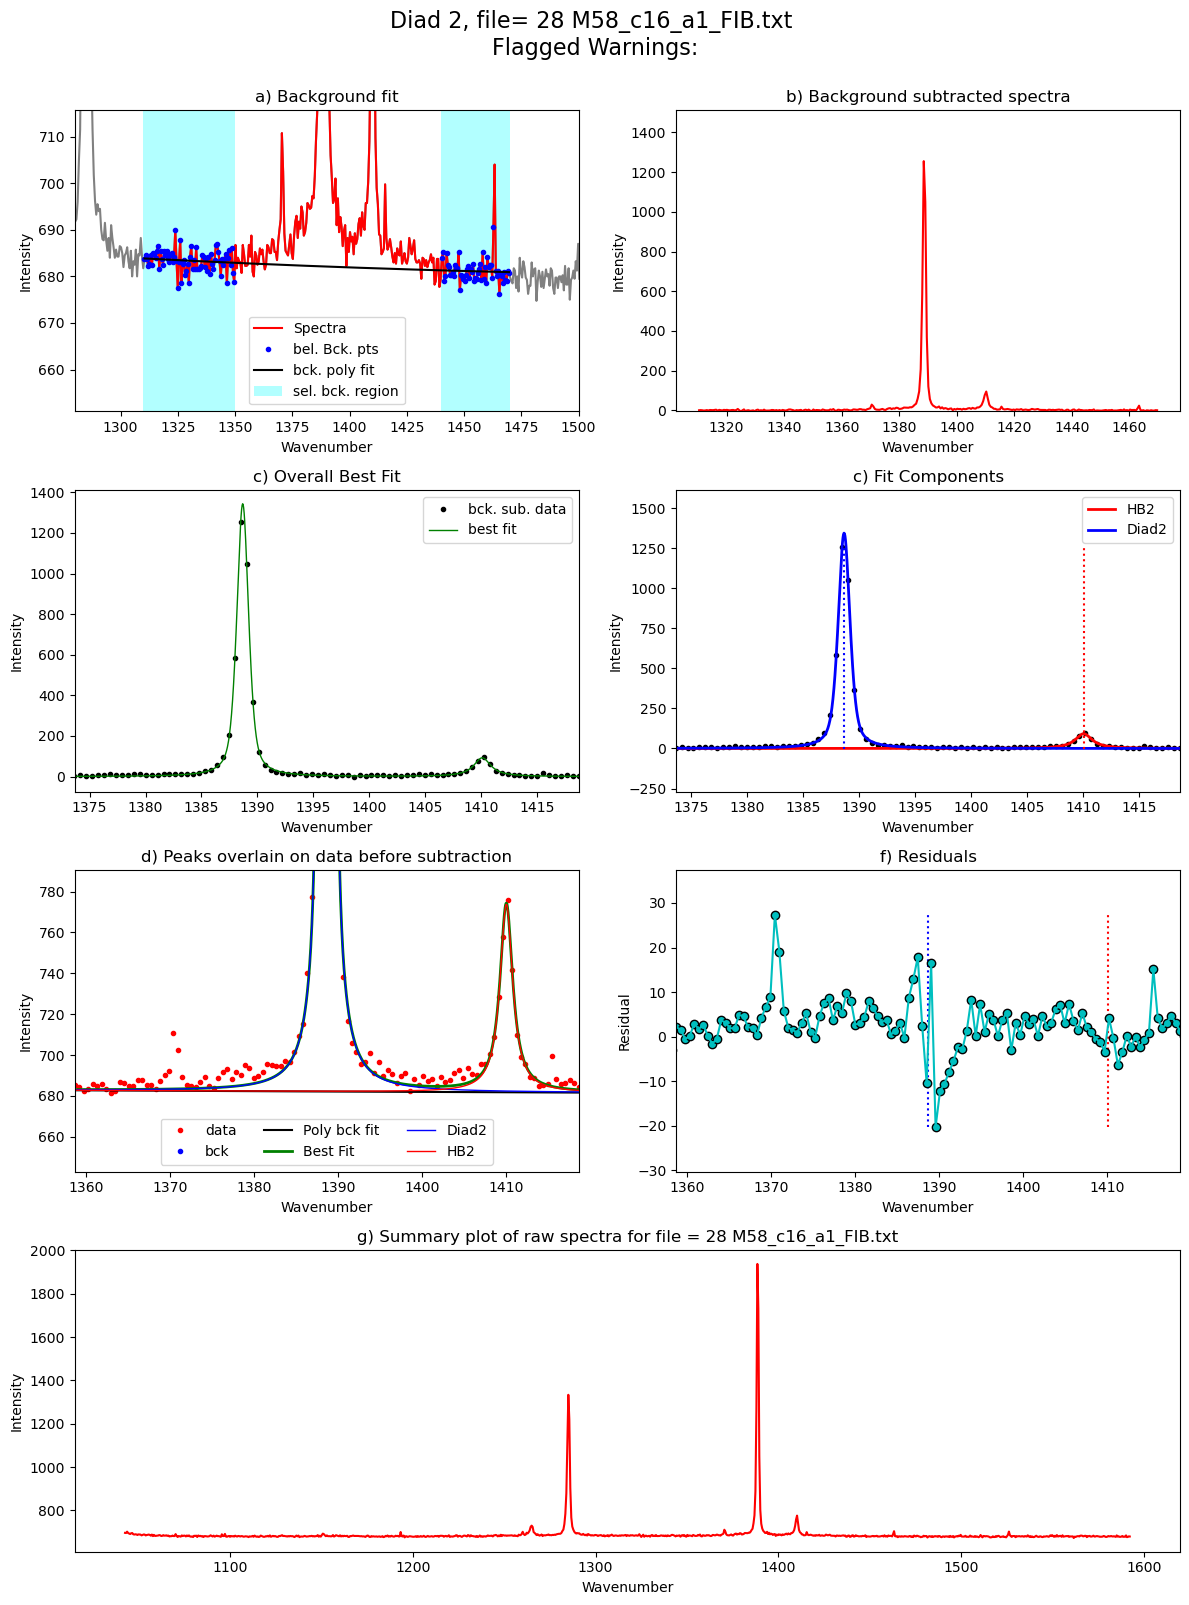

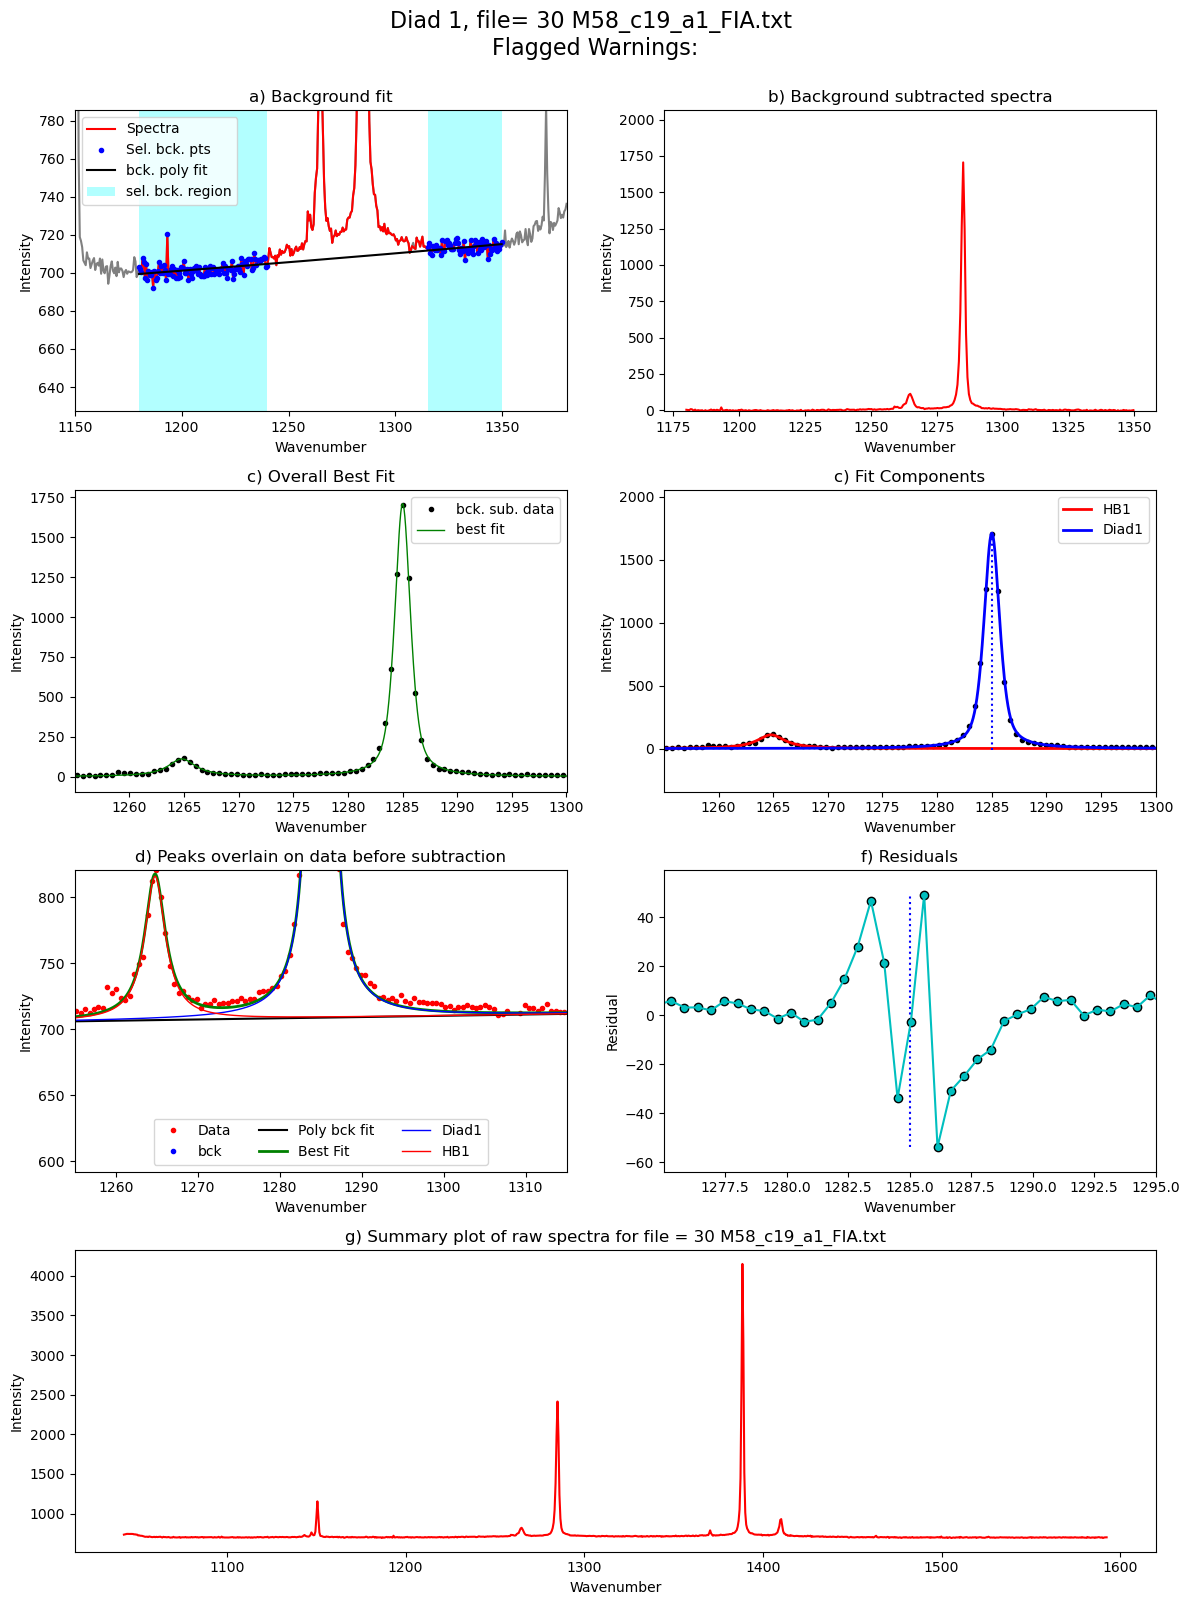

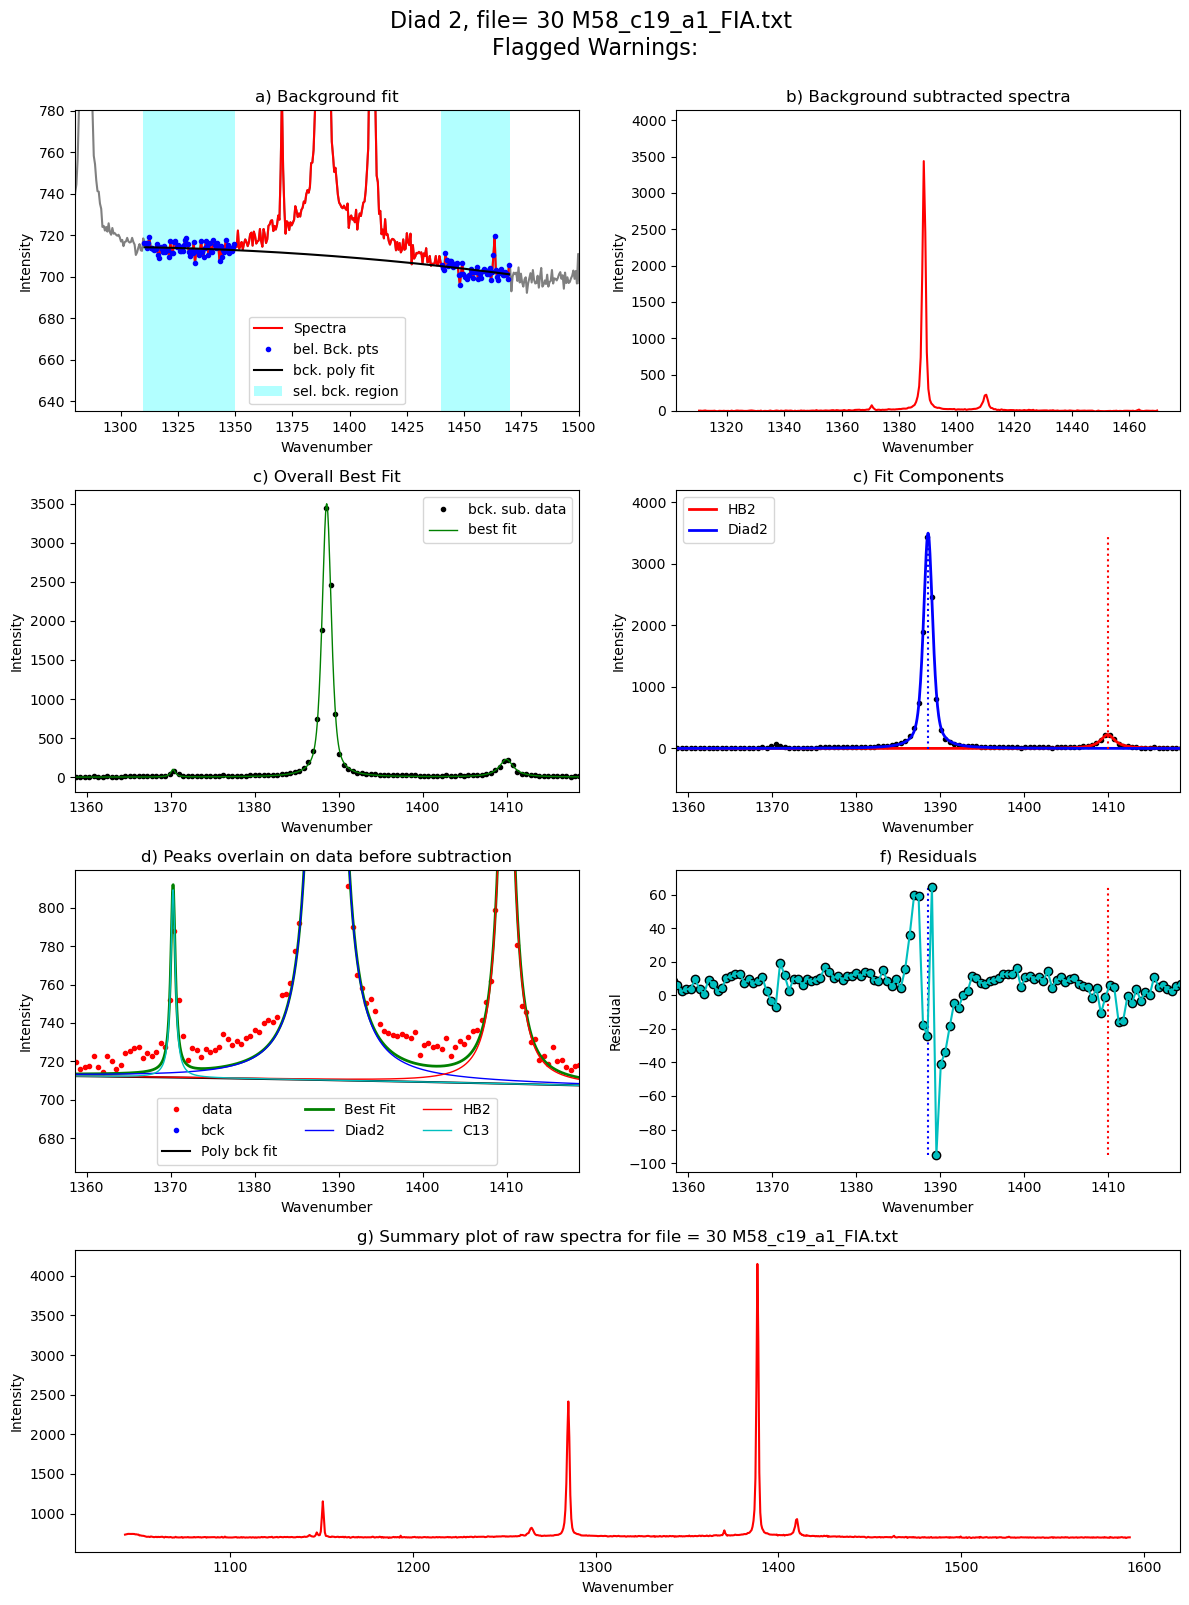

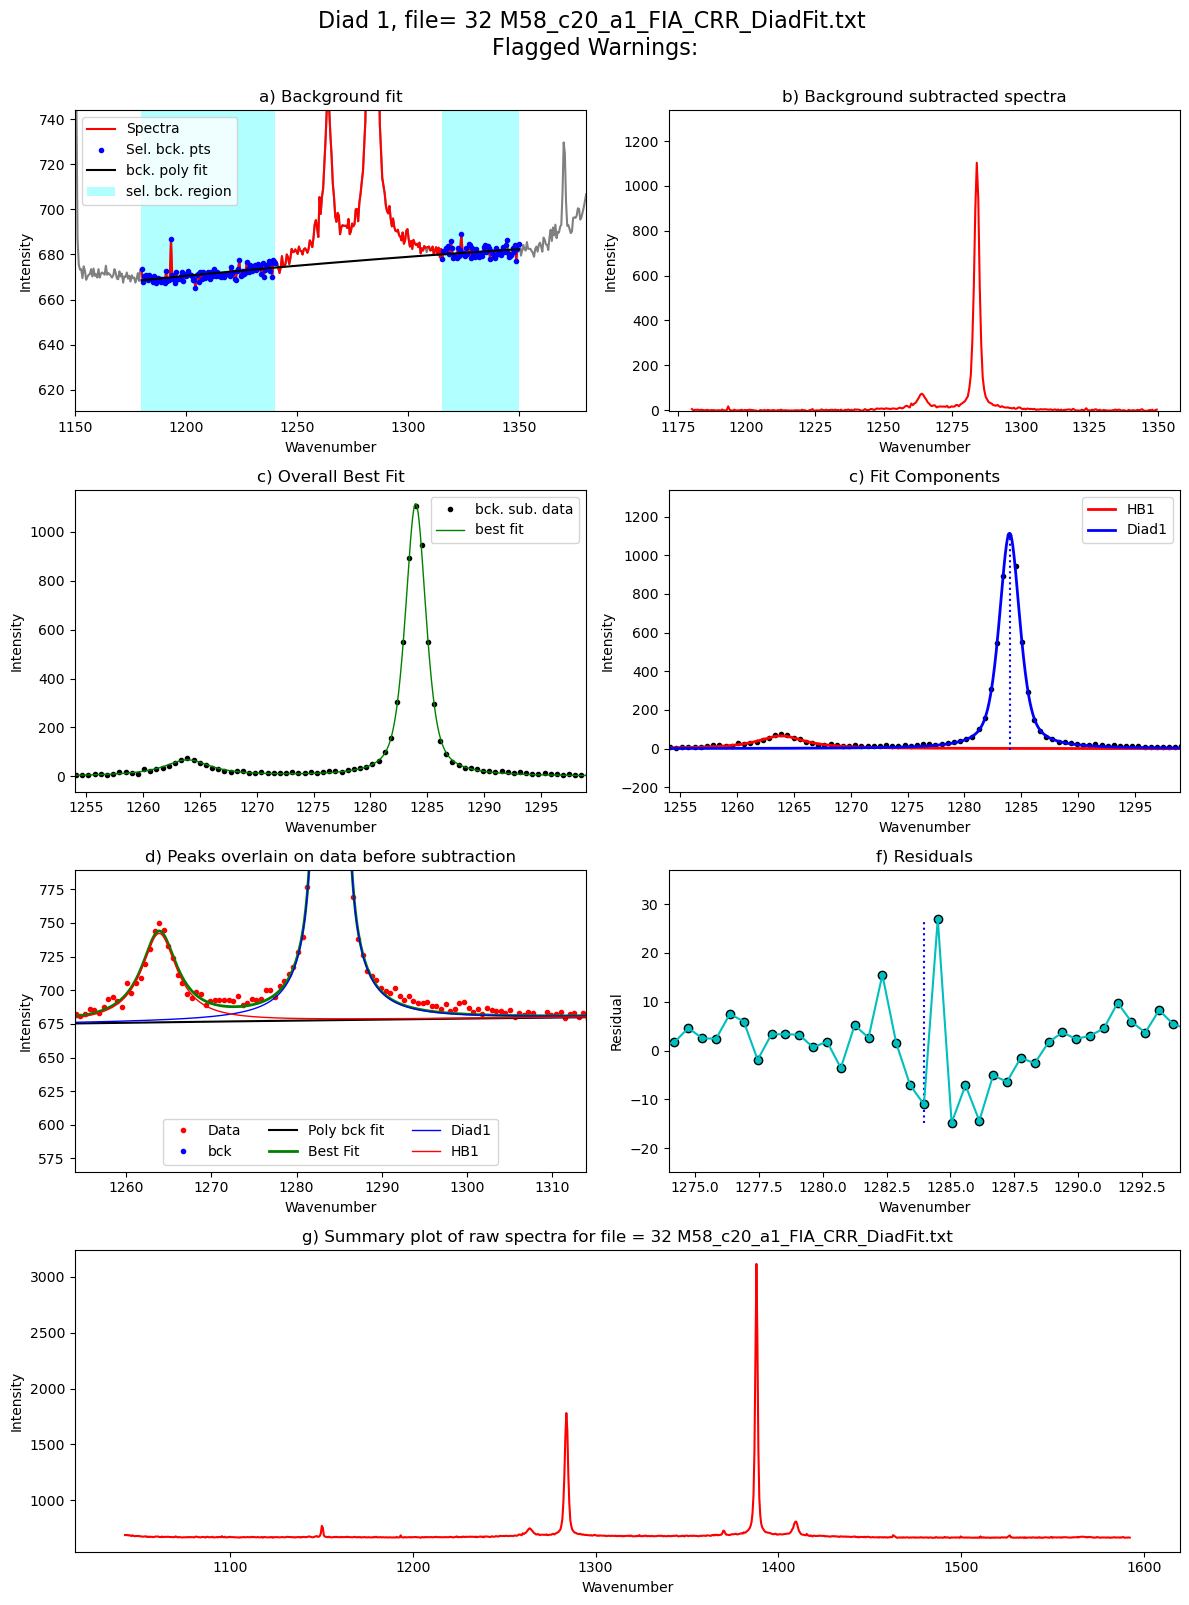

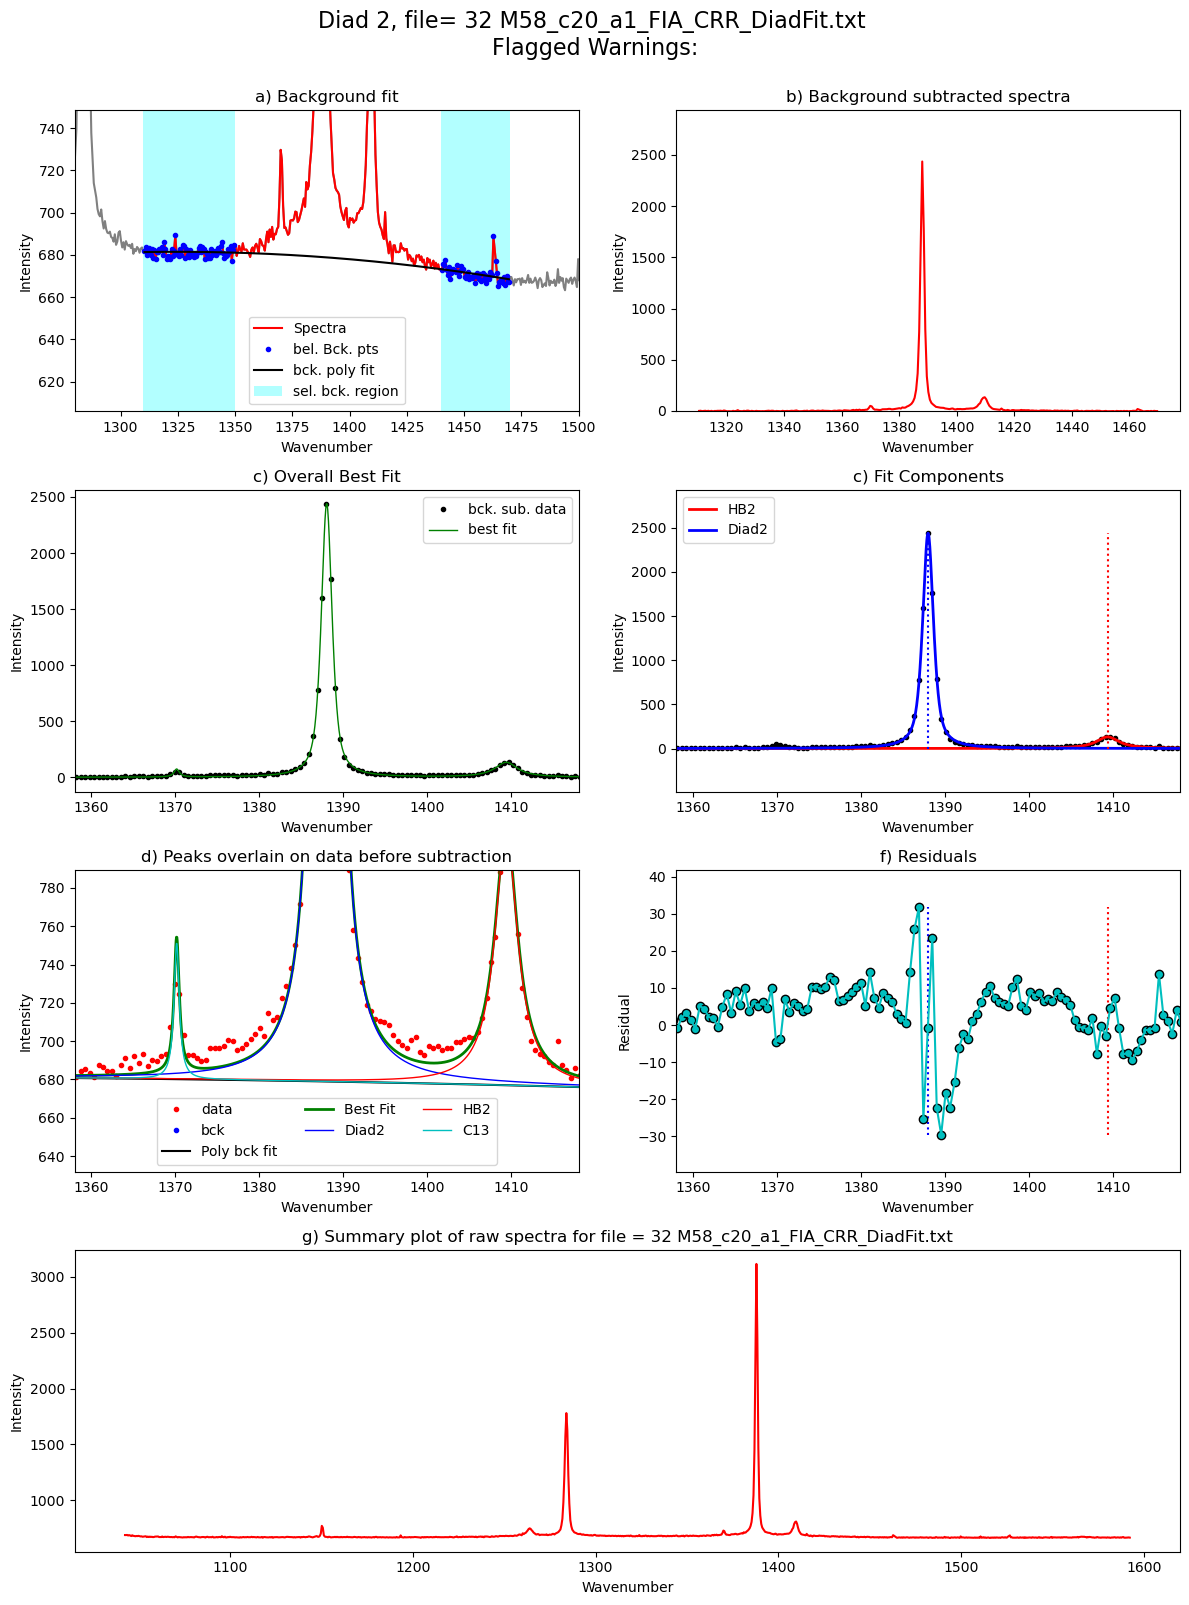

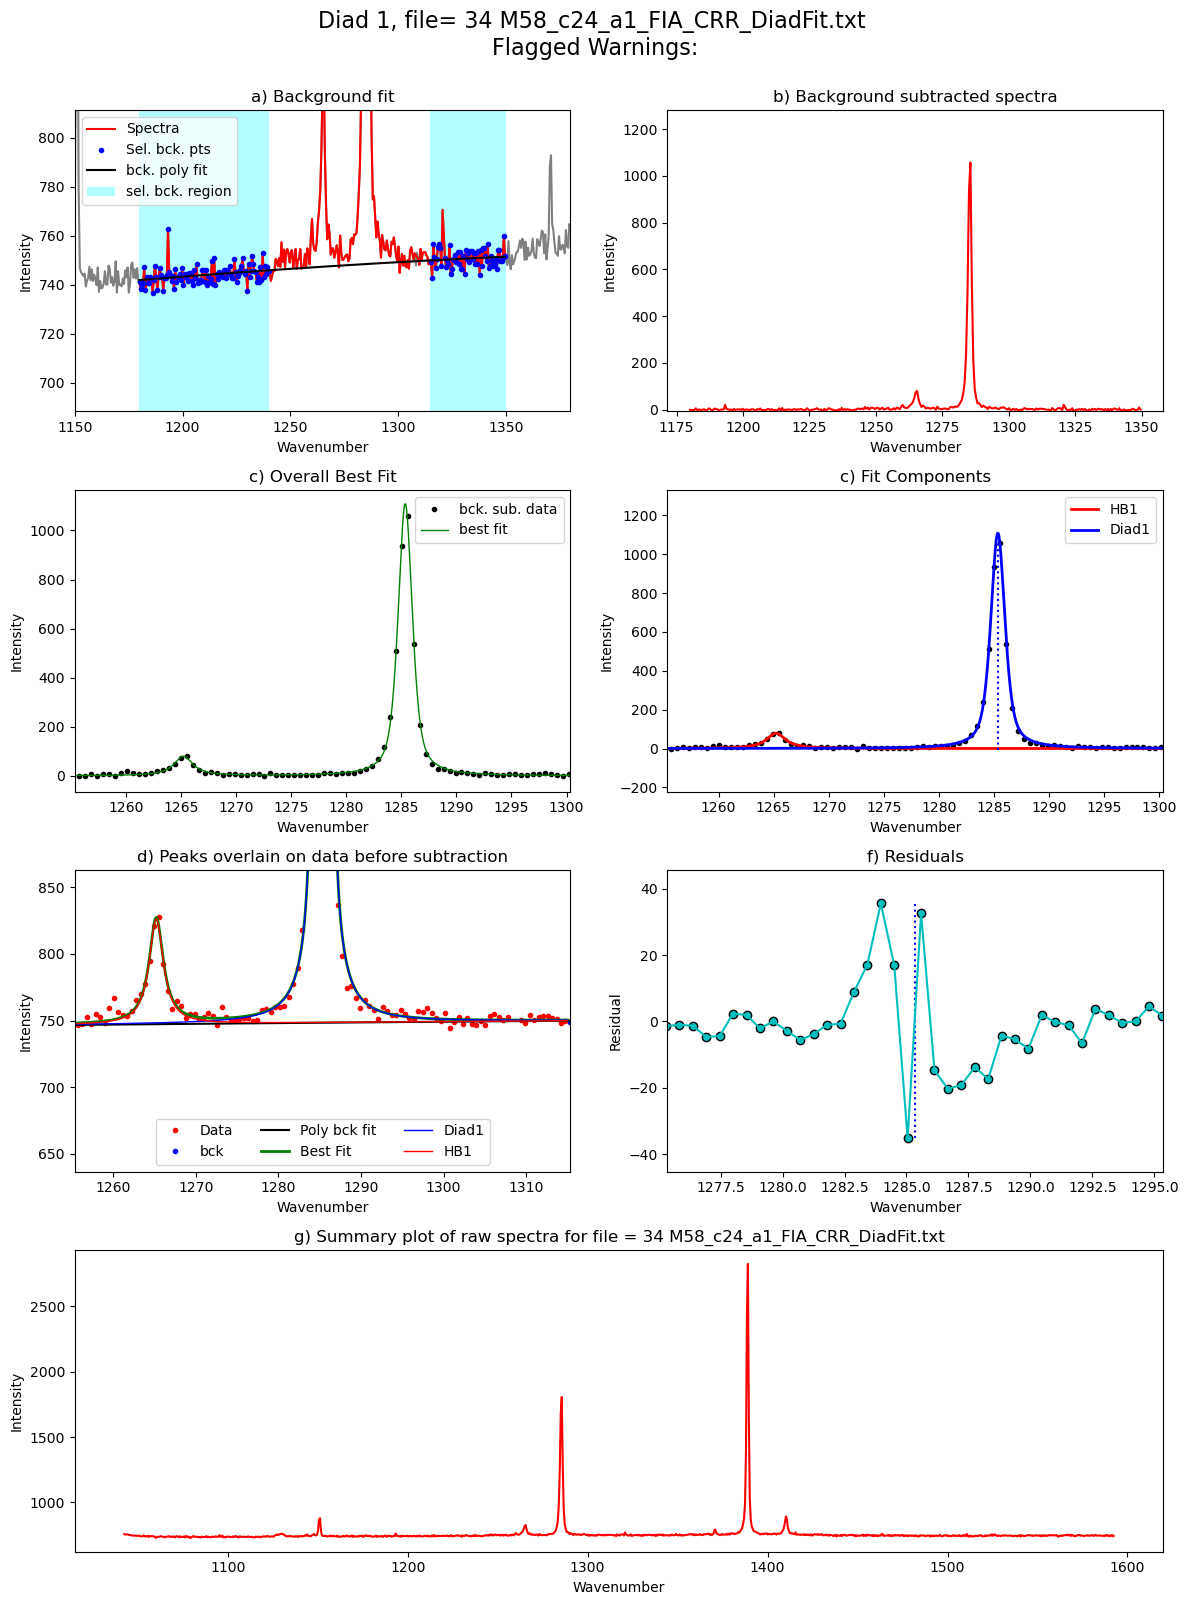

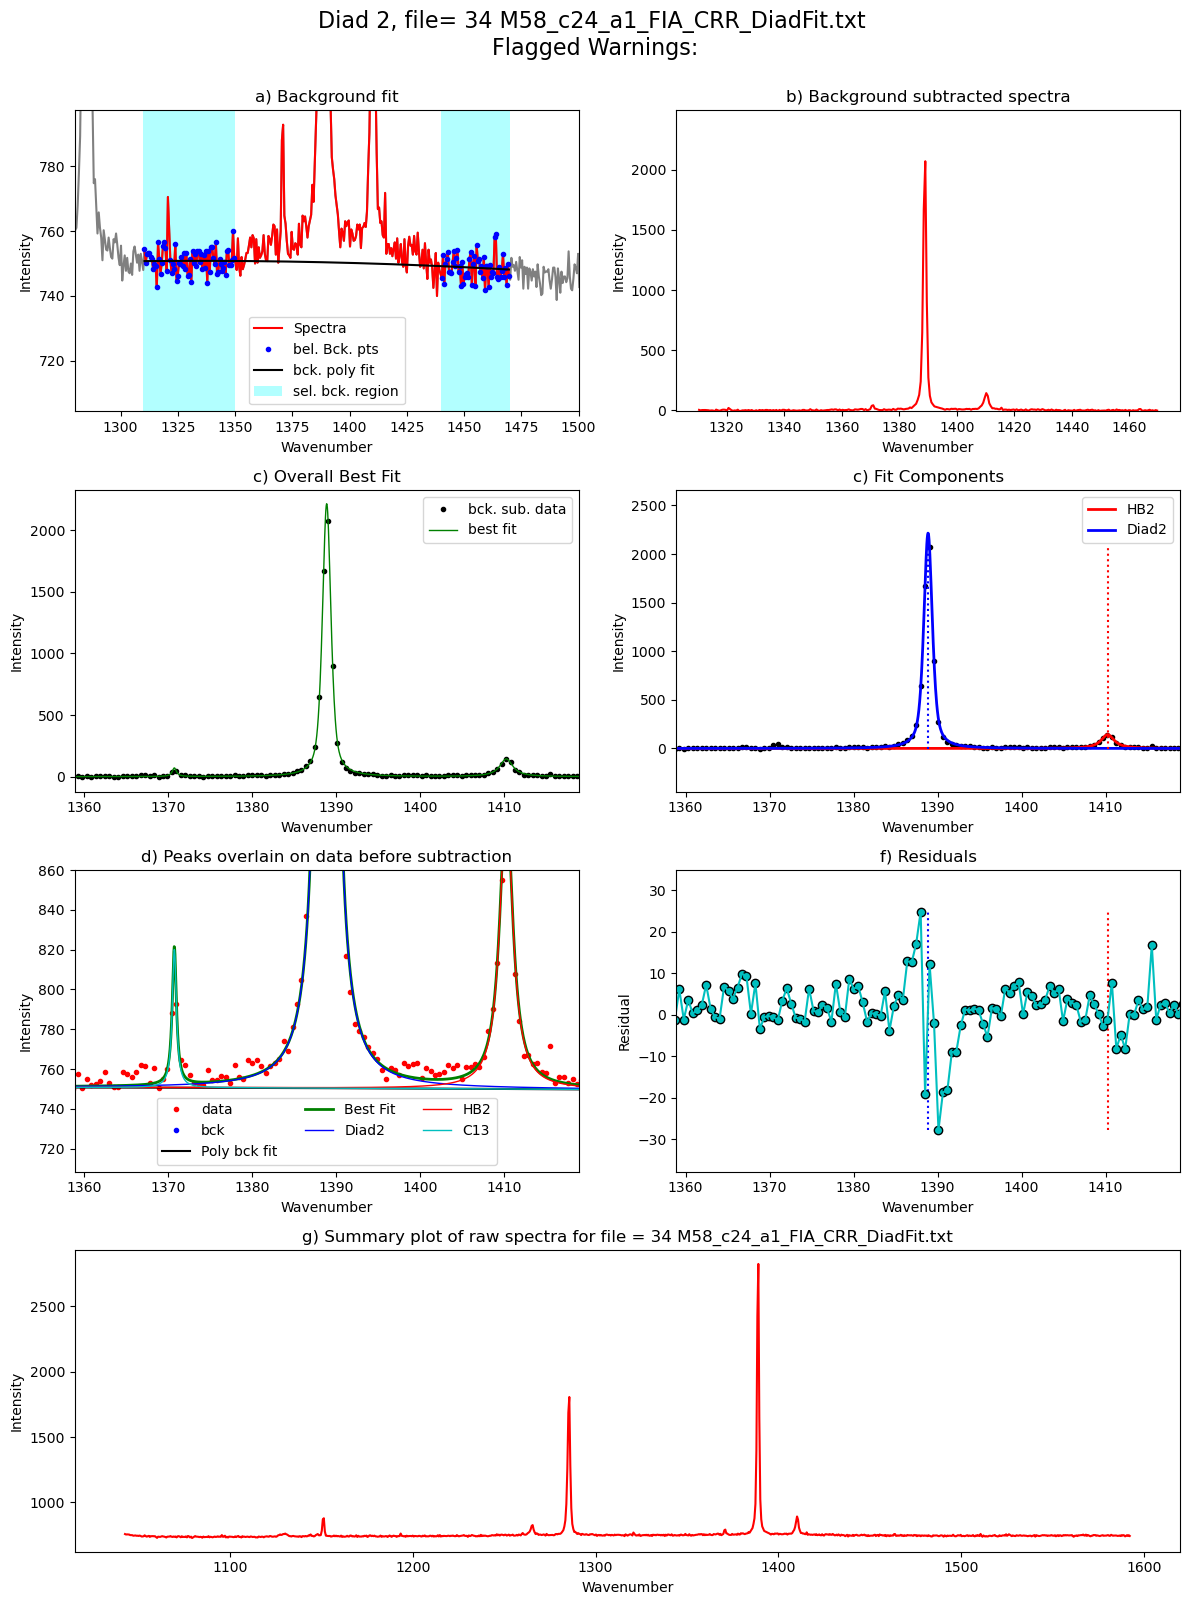

In [54]:
from tqdm import tqdm
plot_figure=True# If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    tqdm.write(f"Processing file: {Diad_Files[i]}")
    
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=spectra_filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config_init.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config_init.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=spectra_filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=prefix, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0).reset_index(drop=True)


In [55]:
# Save parameters to excel
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx', index=False)
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx', index=False)
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx', index=False)
if batch=='Std':
    combo.to_excel('Std_Diads.xlsx', index=False)

In [56]:
combo

filename   Splitting   Split_σ  Diad1_Combofit_Cent  \
0    M58_c2_a1_FIA_CRR_DiadFit  103.456034  0.002550          1285.338356   
1                M58_c3_a1_FIA  103.728381  0.004639          1284.584139   
2                M58_c4_a1_FIA  103.488404  0.004778          1285.240463   
3                M58_c7_a1_FIA  103.673170  0.008066          1284.680906   
4                M58_c9_a1_FIA  103.586102  0.005653          1284.943361   
5               M58_c11_a1_FIA  103.825471  0.004991          1284.378779   
6               M58_c13_a1_FIA  103.201681  0.005501          1285.953787   
7               M58_c13_a2_FIB  103.215498  0.002640          1285.960890   
8               M58_c16_a1_FIB  103.559733  0.004556          1285.122731   
9               M58_c19_a1_FIA  103.579171  0.003771          1285.006578   
10  M58_c20_a1_FIA_CRR_DiadFit  104.034413  0.003374          1283.979157   
11  M58_c24_a1_FIA_CRR_DiadFit  103.514646  0.003865          1285.353569   

    Diad1_cent_err  Diad1_Combofit_Height  Diad1_Voigt_Cent  Diad1_Voigt_Area  \
0         0.002218            1453.107904       1285.338406       2791.147753   
1         0.004044             997.179787       1284.584189       2709.900844   
2         0.003928             620.915553       1285.240513       1330.470927   
3         0.007293            1033.864634       1284.680956       3061.826950   
4         0.005129             499.771065       1284.943411       1218.613890   
5         0.004432             998.655343       1284.378829       2905.377331   
6         0.004934             328.265044       1285.953787        471.218854   
7         0.002270             666.043097       1285.960940        921.331539   
8         0.004053             668.160389       1285.122781       1435.599593   
9         0.003158            1710.943691       1285.006628       3965.586013   
10        0.002858            1114.232938       1283.979207       3260.611153   
11        0.003580            1108.932671       1285.353619       2346.404465   

    Diad1_Voigt_Sigma  Diad1_Residual  ...  Diad1_Asym50  Diad1_Asym70  \
0            0.713516        4.407700  ...      1.172500      1.176685   
1            1.039099        3.761448  ...      1.152098      1.206986   
2            0.809045        2.764506  ...      1.150776      1.200328   
3            1.139090        5.672409  ...      1.367491      1.466491   
4            0.887467        2.425961  ...      1.213531      1.280675   
5            1.125591        3.708580  ...      1.239460      1.253695   
6            0.570862        2.342246  ...      1.238245      1.239437   
7            0.536919        2.106174  ...      1.241042      1.248768   
8            0.800572        2.795440  ...      1.075758      1.149671   
9            0.853599        6.019247  ...      1.114583      1.187597   
10           1.079596        3.873428  ...      1.097360      1.094688   
11           0.770965        4.591351  ...      1.270936      1.274783   

   Diad1_Yuan2017_sym_factor  Diad1_Remigi2021_BSF  Diad2_Asym50  \
0                   0.246163              0.000982      1.093220   
1                   0.316090              0.002084      1.213033   
2                   0.243969              0.002606      1.041558   
3                   0.837211              0.002204      1.216092   
4                   0.379003              0.003551      1.002475   
5                   0.539069              0.002254      1.036481   
6                   0.272009              0.003478      1.184116   
7                   0.258841              0.001612      1.207885   
8                   0.121299              0.002396      1.091892   
9                   0.195616              0.000998      1.060686   
10                  0.210218              0.001938      1.008811   
11                  0.417764              0.001390      1.206395   

    Diad2_Asym70  Diad2_Yuan2017_sym_factor  Diad2_Remigi2021_BSF  \
0       1.103896                   0.105849      

### This plays a sound when the notebook is done if you have a tendency to procrastinate

In [57]:
# !pip install winotify

from winotify import Notification, audio

toast= Notification(app_id="VSCode",title="Notebook completed",
                    msg="Step3b_Secondary_Peaks is done!",
                    duration="short")
toast.set_audio(audio.Mail,loop=False)
toast.show()